In [3]:
import pandas as pd
import numpy as np

In [4]:
from keras.wrappers.scikit_learn import KerasClassifier

In [5]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout,Activation

from keras.layers.convolutional import Conv1D
from keras import backend as K
from keras.layers.core import Lambda
from keras.layers.convolutional import MaxPooling1D
#from keras.layers.embeddings import Embedding
from keras.layers import Embedding

import keras
from keras.utils import np_utils

In [8]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("IDS_Combined_Data_IoT.csv")

In [10]:
data.head(5)

,ts,date,time,fridge_temperature,temp_condition,label,type,door_state,sphone_signal,latitude,...,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,motion_status,light_status,current_temperature,thermostat_status,temperature,pressure,humidity
0,1556245180,25-Apr-19,19:19:40,9.00,1,1,ddos,0,0,4.514077,...,32708,32035,32728,0,0,28.442693,1,23.016184,1.035,46.343618
1,1556245180,25-Apr-19,19:19:40,9.25,1,1,ddos,0,0,4.514077,...,32708,32035,32728,0,0,28.442693,1,38.620990,1.035,46.343618
2,1556245185,25-Apr-19,19:19:45,12.65,1,1,ddos,0,0,4.514077,...,32708,32035,32728,0,0,28.442693,1,42.732741,1.035,46.343618
3,1556245185,25-Apr-19,19:19:45,4.65,0,1,ddos,0,0,4.514077,...,32708,32035,32728,0,0,28.442693,1,37.785562,1.035,46.343618
4,1556245195,25-Apr-19,19:19:55,12.65,1,1,ddos,0,0,4.514077,...,32708,32035,32728,0,0,28.442693,1,36.353584,1.035,46.343618


In [11]:
dataset = data.drop(['ts', 'date', 'time'], axis =1)

In [12]:
dataset.head(5)

,fridge_temperature,temp_condition,label,type,door_state,sphone_signal,latitude,longitude,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,motion_status,light_status,current_temperature,thermostat_status,temperature,pressure,humidity
0,9.00,1,1,ddos,0,0,4.514077,14.421946,32450,32708,32035,32728,0,0,28.442693,1,23.016184,1.035,46.343618
1,9.25,1,1,ddos,0,0,4.514077,14.421946,32450,32708,32035,32728,0,0,28.442693,1,38.620990,1.035,46.343618
2,12.65,1,1,ddos,0,0,4.514077,14.421946,32450,32708,32035,32728,0,0,28.442693,1,42.732741,1.035,46.343618
3,4.65,0,1,ddos,0,0,4.514077,14.421946,32450,32708,32035,32728,0,0,28.442693,1,37.785562,1.035,46.343618
4,12.65,1,1,ddos,0,0,4.514077,14.421946,32450,32708,32035,32728,0,0,28.442693,1,36.353584,1.035,46.343618


In [13]:
dataset['type'].value_counts()

normal        245000
backdoor       35000
injection      35000
password       35000
ddos           25000
ransomware     16030
xss             6116
scanning        3973
Name: type, dtype: int64

In [14]:
dataset.isna().sum().sum()

0

In [15]:
dataset.columns

Index(['fridge_temperature', 'temp_condition', 'label', 'type', 'door_state',
       'sphone_signal', 'latitude', 'longitude', 'FC1_Read_Input_Register',
       'FC2_Read_Discrete_Value', 'FC3_Read_Holding_Register', 'FC4_Read_Coil',
       'motion_status', 'light_status', 'current_temperature',
       'thermostat_status', 'temperature', 'pressure', 'humidity'],
      dtype='object')

In [16]:
X = dataset.drop(['label','type'], axis = 1)
X.shape

(401119, 17)

In [17]:
y = dataset['type']
y.shape

(401119,)

In [18]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8))) #don't change these values
X_T = sel.fit(X)

In [19]:
sel_cols = X_T.get_support(indices=True)
X_VT = X.iloc[:,sel_cols]
X_VT

,fridge_temperature,latitude,longitude,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,temperature,pressure,humidity
0,9.00,4.514077,14.421946,32450,32708,32035,32728,28.442693,23.016184,1.035000,46.343618
1,9.25,4.514077,14.421946,32450,32708,32035,32728,28.442693,38.620990,1.035000,46.343618
2,12.65,4.514077,14.421946,32450,32708,32035,32728,28.442693,42.732741,1.035000,46.343618
3,4.65,4.514077,14.421946,32450,32708,32035,32728,28.442693,37.785562,1.035000,46.343618
4,12.65,4.514077,14.421946,32450,32708,32035,32728,28.442693,36.353584,1.035000,46.343618
...,...,...,...,...,...,...,...,...,...,...,...
401114,6.70,4.514077,14.421946,32450,32708,32035,32728,28.442693,24.250404,2.204924,37.024913
401115,6.70,4.514077,14.421946,32450,32708,32035,32728,28.442693,20.155984,-2.030547,90.297894
401116,6.70,4.514077,14.421946,32450,32708,32035,32728,28.442693,24.577566,0.872942,37.687701
401117,6.70,4.514077,14.421946,32450,32708,32035,32728,28.442693,20.913710,3.168207,93.647950


In [20]:
scaler = MinMaxScaler()
X_M = scaler.fit_transform(X_VT)
print(X_M)

[[0.61538462 0.00821665 0.00811167 ... 0.10772138 0.53355618 0.46251056]
 [0.63461538 0.00821665 0.00811167 ... 0.66504042 0.53355618 0.46251056]
 [0.89615385 0.00821665 0.00811167 ... 0.81188986 0.53355618 0.46251056]
 ...
 [0.43846154 0.00821665 0.00811167 ... 0.16348547 0.52695586 0.3756012 ]
 [0.43846154 0.00821665 0.00811167 ... 0.03263243 0.62043775 0.93746771]
 [0.43846154 0.00821665 0.00811167 ... 0.04525255 0.58120503 0.3689465 ]]


In [21]:
trainX, testX, trainY, testY = train_test_split(X_M, y, test_size = 0.20, random_state = 40)

In [22]:
print(X_M.shape)
print(y.shape)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(401119, 11)
(401119,)
(320895, 11)
(320895,)
(80224, 11)
(80224,)


In [ ]:
#Test Train split
lr = LogisticRegression(multi_class='ovr') #for multiclass
lr.fit(trainX, trainY)
y_predict = lr.predict(testX)
print(accuracy_score(testY, y_predict))
print(classification_report(testY, y_predict))

In [24]:
#Grid Search CV
model = LogisticRegression(multi_class='ovr') 

parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'C': [100, 10, 1.0, 0.1, 0.01]}]

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3, n_jobs = -1)

grid_search = grid_search.fit(trainX, trainY)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred = grid_search.predict(testX)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(testY, y_pred)))
print(confusion_matrix(testY,y_pred))
print(classification_report(testY,y_pred))

Best Results with Grid Search:
0.6617834494149176
{'C': 100, 'solver': 'newton-cg'}

Accuracy Score  on test data: 0.6601391104906262
[[   56    68     7  6835   122     9     1     0]
 [   21  1123    24   612  3061   191     0     0]
 [    0    91   115  6513   200    11     0     0]
 [   77   183    17 47464   963   189     3     0]
 [    0   257   166  2880  3717    21     0     0]
 [    0   727     0   399  1610   418     0     0]
 [    0   100     3    97    13   527    57     0]
 [    0   345     0   142   101   679     0     9]]
              precision    recall  f1-score   support

    backdoor       0.36      0.01      0.02      7098
        ddos       0.39      0.22      0.28      5032
   injection       0.35      0.02      0.03      6930
      normal       0.73      0.97      0.83     48896
    password       0.38      0.53      0.44      7041
  ransomware       0.20      0.13      0.16      3154
    scanning       0.93      0.07      0.13       797
         xss       1.00 

In [ ]:
#Test Train split
lda = LinearDiscriminantAnalysis()
lda.fit(trainX, trainY)
y_predict = lda.predict(testX)
print(accuracy_score(testY, y_predict))
print(classification_report(testY, y_predict))

In [25]:
#Grid search CV
model = LinearDiscriminantAnalysis() 

parameters = [{'solver': ['svd', 'lsqr', 'eigen']}]

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3, n_jobs = -1)

grid_search = grid_search.fit(trainX, trainY)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred = grid_search.predict(testX)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(testY, y_pred)))
print(confusion_matrix(testY,y_pred))
print(classification_report(testY,y_pred))

Best Results with Grid Search:
0.722850153476994
{'solver': 'svd'}

Accuracy Score  on test data: 0.7195726964499402
[[  250    51    25  6574   104    76     5    13]
 [   42   982    10   561  1468  1730   203    36]
 [    0    92   638  5007  1096    74    10    13]
 [  126    83   125 46967   888   556    16   135]
 [    0   225   177   861  5655   102     5    16]
 [    0   201     3   366    61  2497    19     7]
 [    0     1     5    90     9    10   179   503]
 [    0     1     0   136    23   534    23   559]]
              precision    recall  f1-score   support

    backdoor       0.60      0.04      0.07      7098
        ddos       0.60      0.20      0.29      5032
   injection       0.65      0.09      0.16      6930
      normal       0.78      0.96      0.86     48896
    password       0.61      0.80      0.69      7041
  ransomware       0.45      0.79      0.57      3154
    scanning       0.39      0.22      0.28       797
         xss       0.44      0.44      0.

In [22]:
#Test Train split
#default parameters used in base paper (n_neighbors, default=5) (p, default=2 for Euclidean Distance)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(trainX, trainY)
y_predict = knn.predict(testX)
print(accuracy_score(testY, y_predict))
print(classification_report(testY, y_predict))

0.8139833466294376
              precision    recall  f1-score   support

    backdoor       0.49      0.47      0.48      7098
        ddos       0.74      0.78      0.76      5032
   injection       0.73      0.73      0.73      6930
      normal       0.89      0.91      0.90     48896
    password       0.78      0.68      0.73      7041
  ransomware       0.77      0.69      0.73      3154
    scanning       0.80      0.79      0.80       797
         xss       0.76      0.60      0.67      1276

    accuracy                           0.81     80224
   macro avg       0.74      0.71      0.72     80224
weighted avg       0.81      0.81      0.81     80224



In [27]:
#Grid search CV
model = KNeighborsClassifier()

parameters = [{'n_neighbors': [5,7,9,11], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}]

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3, n_jobs = -1)

grid_search = grid_search.fit(trainX, trainY)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred = grid_search.predict(testX)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(testY, y_pred)))
print(confusion_matrix(testY,y_pred))
print(classification_report(testY,y_pred))

Best Results with Grid Search:
0.8318047959612956
{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

Accuracy Score  on test data: 0.8330923414439569
[[ 2583    54   458  3851    98    39     3    12]
 [   63  3879    66   450   351   199    13    11]
 [  604    59  5030   703   482    36     7     9]
 [  652   319   482 46456   616   214    56   101]
 [   66   403   691   713  5097    54     5    12]
 [   20   357    42   306    47  2347     1    34]
 [    8     8     6    89     8     3   654    21]
 [    5    19    15   151    19   174   105   788]]
              precision    recall  f1-score   support

    backdoor       0.65      0.36      0.47      7098
        ddos       0.76      0.77      0.77      5032
   injection       0.74      0.73      0.73      6930
      normal       0.88      0.95      0.91     48896
    password       0.76      0.72      0.74      7041
  ransomware       0.77      0.74      0.75      3154
    scanning       0.77      0.82      0.80    

In [22]:
#Test Train split
rf = RandomForestClassifier(n_estimators=10,criterion='gini')
rf.fit(trainX, trainY)
y_predict1 = rf.predict(testX)
print(accuracy_score(testY, y_predict1))
print(classification_report(testY, y_predict1))

0.8091344236138811
              precision    recall  f1-score   support

    backdoor       0.53      0.47      0.50      7098
        ddos       0.72      0.73      0.72      5032
   injection       0.71      0.73      0.72      6930
      normal       0.88      0.91      0.90     48896
    password       0.74      0.70      0.72      7041
  ransomware       0.72      0.69      0.71      3154
    scanning       0.77      0.75      0.76       797
         xss       0.71      0.63      0.67      1276

    accuracy                           0.81     80224
   macro avg       0.72      0.70      0.71     80224
weighted avg       0.80      0.81      0.81     80224



In [29]:
#Grid Search CV
model = RandomForestClassifier()

parameters = [{'n_estimators': [20, 50], 'min_samples_split':[2, 5],
              'min_samples_leaf':[1, 2], 'criterion': ['gini','entropy']}]


grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3, n_jobs = -1)

grid_search = grid_search.fit(trainX, trainY)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred = grid_search.predict(testX)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(testY, y_pred)))
print(confusion_matrix(testY,y_pred))
print(classification_report(testY,y_pred))

Best Results with Grid Search:
0.845494632200564
{'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}

Accuracy Score  on test data: 0.8470158556043079
[[ 2953    54   587  3370    86    34     3    11]
 [   51  3945    69   452   377   118    12     8]
 [  495    61  5299   605   424    30     7     9]
 [  481   299   527 46708   548   193    47    93]
 [   49   343   662   710  5212    50     7     8]
 [   18   384    41   309    51  2310     1    40]
 [    7     9    11    79     7     2   669    13]
 [    9    20    14   131    18   153    76   855]]
              precision    recall  f1-score   support

    backdoor       0.73      0.42      0.53      7098
        ddos       0.77      0.78      0.78      5032
   injection       0.73      0.76      0.75      6930
      normal       0.89      0.96      0.92     48896
    password       0.78      0.74      0.76      7041
  ransomware       0.80      0.73      0.76      3154
    scanning       0.81 

In [23]:
#Test Train Split
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(trainX, trainY)
y_predict1 = dt.predict(testX)
print(accuracy_score(testY, y_predict1))
print(classification_report(testY, y_predict1))

0.783393996808935
              precision    recall  f1-score   support

    backdoor       0.48      0.49      0.49      7098
        ddos       0.70      0.70      0.70      5032
   injection       0.67      0.68      0.68      6930
      normal       0.88      0.88      0.88     48896
    password       0.69      0.68      0.68      7041
  ransomware       0.67      0.66      0.66      3154
    scanning       0.73      0.72      0.72       797
         xss       0.62      0.61      0.62      1276

    accuracy                           0.78     80224
   macro avg       0.68      0.68      0.68     80224
weighted avg       0.78      0.78      0.78     80224



In [28]:
model = DecisionTreeClassifier() 

parameters = [{'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'splitter': ['best','random'],
              'criterion': ['gini', 'entropy']}]

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3, n_jobs = -1)

grid_search = grid_search.fit(trainX, trainY)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred = grid_search.predict(testX)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(testY, y_pred)))
print(confusion_matrix(testY,y_pred))
print(classification_report(testY,y_pred))

Best Results with Grid Search:
0.7948332008912572
{'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}

Accuracy Score  on test data: 0.7971056043079378
[[ 3260    81   530  3092    86    33     3    13]
 [  107  3866    70   490   303   174    12    10]
 [  837    84  4855   674   430    32     6    12]
 [ 2718   494   834 43954   539   212    54    91]
 [  165   457   738  1054  4559    51     7    10]
 [   62   403    61   384    79  2100     1    64]
 [   20    14    11   103    10     2   612    25]
 [   29    32    21   191    28   146    88   741]]
              precision    recall  f1-score   support

    backdoor       0.45      0.46      0.46      7098
        ddos       0.71      0.77      0.74      5032
   injection       0.68      0.70      0.69      6930
      normal       0.88      0.90      0.89     48896
    password       0.76      0.65      0.70      7041
  ransomware       0.76      0.67      0.71      3154
    scanning      

nb = GaussianNB()
nb.fit(trainX, trainY)
y_predict1 = nb.predict(testX)
print(accuracy_score(testY, y_predict1))
print(classification_report(testY, y_predict1))

In [24]:
#Test Train Split
svclassifier = SVC(kernel='rbf', gamma='auto')
svclassifier.fit(trainX, trainY)
y_predict = svclassifier.predict(testX)
print(accuracy_score(testY, y_predict))
print(classification_report(testY, y_predict))

0.7747058236936578
              precision    recall  f1-score   support

    backdoor       0.60      0.02      0.04      7098
        ddos       0.74      0.65      0.69      5032
   injection       0.76      0.51      0.61      6930
      normal       0.81      0.96      0.88     48896
    password       0.67      0.79      0.72      7041
  ransomware       0.59      0.71      0.64      3154
    scanning       0.91      0.21      0.34       797
         xss       0.34      0.26      0.30      1276

    accuracy                           0.77     80224
   macro avg       0.68      0.51      0.53     80224
weighted avg       0.76      0.77      0.73     80224



In [20]:
#Grid Search CV
model = SVC() 

parameters = [{'C': [0.1,1], 'gamma':[0.01,0.5]}]

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3, n_jobs = -1)

grid_search = grid_search.fit(trainX, trainY)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred = grid_search.predict(testX)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(testY, y_pred)))
print(confusion_matrix(testY,y_pred))
print(classification_report(testY,y_pred))

Best Results with Grid Search:
0.8057059162654451
{'C': 1, 'gamma': 0.5}

Accuracy Score  on test data: 0.8049960111687275
[[  580    57   775  5537    90    40    11     8]
 [   38  3431    70   518   683   275    13     4]
 [   86    58  5218  1047   464    40     9     8]
 [  221   345   677 46513   705   264    83    88]
 [   11   138   860   745  5210    59    10     8]
 [    0   349    46   335    49  2365     2     8]
 [    6     8     6    84     8     3   656    26]
 [    0    16    18   133    19   327   156   607]]
              precision    recall  f1-score   support

    backdoor       0.62      0.08      0.14      7098
        ddos       0.78      0.68      0.73      5032
   injection       0.68      0.75      0.71      6930
      normal       0.85      0.95      0.90     48896
    password       0.72      0.74      0.73      7041
  ransomware       0.70      0.75      0.72      3154
    scanning       0.70      0.82      0.76       797
         xss       0.80      0.48  

### LSTM

In [21]:
# LSTM training (label encoder + shape)
encoder = LabelEncoder()
encoder.fit(trainY)
y_train_L = encoder.transform(trainY) #for sparse_categorical
X_train_L = trainX.reshape((-1, 1, trainX.shape[1]))

In [22]:
# LSTM testing (label encoder + shape)
encoder = LabelEncoder()
encoder.fit(testY)
y_test_L = encoder.transform(testY) #for sparse_categorical
X_test_L = testX.reshape((-1, 1, testX.shape[1]))

In [23]:
print(X_train_L.shape)
print(y_train_L.shape)
print(X_test_L.shape)
print(y_test_L.shape)

(320895, 1, 11)
(320895,)
(80224, 1, 11)
(80224,)


In [25]:
#X_M.shape

In [26]:
#X1 = X_M.reshape((-1, 1, 11))

In [27]:
#X1.shape

In [28]:
#len(np.unique(y))

In [29]:
#encoder = LabelEncoder()
#encoder.fit(y)
#y_E = encoder.transform(y)

In [30]:
#y_E.shape

In [31]:
#np.unique(y_E)

In [32]:
#(X_train_L, X_test_L, y_train_L, y_test_L) = train_test_split(X1, y_E, test_size = 0.20, random_state = 40)

In [26]:
#Perceptron Tuning

def create_model(unit):
    model = Sequential()
    model.add(LSTM(units=unit, input_shape=(1, 11), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=1, epochs = 35, batch_size = 64)

parameters = {
    'unit': [10,20,30,40,50,60,70,80,90,100],
    #'activation': ['relu','tanh'], 
    #'solver': ['adam','sgd'], 
    #'last_act': ['sigmoid','softmax'],
    #'epochs': [70,100],
    #'batch_size': [5,10] 
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3) # run 1 job at a time

grid_search = grid_search.fit(X_train_L, y_train_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

C:\Users\f190806\AppData\Local\Temp\2\ipykernel_7188\1247680612.py:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=1, epochs = 35, batch_size = 64)


Epoch 1/35
3343/3343 [==============================] - 13s 3ms/step - loss: 1.1428 - accuracy: 0.6399
Epoch 2/35
3343/3343 [==============================] - 11s 3ms/step - loss: 0.9416 - accuracy: 0.7019
Epoch 3/35
3343/3343 [==============================] - 11s 3ms/step - loss: 0.9164 - accuracy: 0.7159
Epoch 4/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.9017 - accuracy: 0.7239
Epoch 5/35
3343/3343 [==============================] - 11s 3ms/step - loss: 0.8896 - accuracy: 0.7339
Epoch 6/35
3343/3343 [==============================] - 11s 3ms/step - loss: 0.8818 - accuracy: 0.7379
Epoch 7/35
3343/3343 [==============================] - 11s 3ms/step - loss: 0.8761 - accuracy: 0.7414
Epoch 8/35
3343/3343 [==============================] - 11s 3ms/step - loss: 0.8668 - accuracy: 0.7478
Epoch 9/35
3343/3343 [==============================] - 11s 3ms/step - loss: 0.8567 - accuracy: 0.7521
Epoch 10/35
3343/3343 [==============================] - 11s 3ms/step - l

3343/3343 [==============================] - 10s 3ms/step - loss: 0.7664 - accuracy: 0.7753
Epoch 10/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7554 - accuracy: 0.7762
Epoch 11/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7474 - accuracy: 0.7791
Epoch 12/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7409 - accuracy: 0.7804
Epoch 13/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7353 - accuracy: 0.7811
Epoch 14/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7311 - accuracy: 0.7822
Epoch 15/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7257 - accuracy: 0.7840
Epoch 16/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7219 - accuracy: 0.7843
Epoch 17/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7190 - accuracy: 0.7851
Epoch 18/35
3343/3343 [==============================] - 10s 3ms/step - loss

3343/3343 [==============================] - 10s 3ms/step - loss: 0.7135 - accuracy: 0.7856
Epoch 18/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7106 - accuracy: 0.7872
Epoch 19/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7062 - accuracy: 0.7888
Epoch 20/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7038 - accuracy: 0.7888
Epoch 21/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7009 - accuracy: 0.7903
Epoch 22/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6968 - accuracy: 0.7916
Epoch 23/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6945 - accuracy: 0.7920
Epoch 24/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6932 - accuracy: 0.7930
Epoch 25/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6909 - accuracy: 0.7921
Epoch 26/35
3343/3343 [==============================] - 10s 3ms/step - loss

3343/3343 [==============================] - 10s 3ms/step - loss: 0.6509 - accuracy: 0.8058
Epoch 26/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6497 - accuracy: 0.8058
Epoch 27/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6476 - accuracy: 0.8065
Epoch 28/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6474 - accuracy: 0.8064
Epoch 29/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6450 - accuracy: 0.8077
Epoch 30/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6443 - accuracy: 0.8071
Epoch 31/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6423 - accuracy: 0.8081
Epoch 32/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6418 - accuracy: 0.8074
Epoch 33/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6407 - accuracy: 0.8079
Epoch 34/35
3343/3343 [==============================] - 10s 3ms/step - loss

3343/3343 [==============================] - 10s 3ms/step - loss: 0.6298 - accuracy: 0.8107
Epoch 34/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6283 - accuracy: 0.8105
Epoch 35/35
3343/3343 [==============================] - 6s 2ms/step
Epoch 1/35
3343/3343 [==============================] - 12s 3ms/step - loss: 0.9805 - accuracy: 0.6906
Epoch 2/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.8282 - accuracy: 0.7523
Epoch 3/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7910 - accuracy: 0.7671
Epoch 4/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7721 - accuracy: 0.7763
Epoch 5/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7574 - accuracy: 0.7808
Epoch 6/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7424 - accuracy: 0.7857
Epoch 7/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7285 - accuracy: 0.7885
Epoch 8/35
334

Epoch 1/35
3343/3343 [==============================] - 12s 3ms/step - loss: 0.9919 - accuracy: 0.6842
Epoch 2/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.8431 - accuracy: 0.7473
Epoch 3/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7978 - accuracy: 0.7670
Epoch 4/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7752 - accuracy: 0.7768
Epoch 5/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7577 - accuracy: 0.7829
Epoch 6/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7419 - accuracy: 0.7876
Epoch 7/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7272 - accuracy: 0.7906
Epoch 8/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7163 - accuracy: 0.7932
Epoch 9/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7043 - accuracy: 0.7954
Epoch 10/35
3343/3343 [==============================] - 10s 3ms/step - l

3343/3343 [==============================] - 10s 3ms/step - loss: 0.6957 - accuracy: 0.7952
Epoch 10/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6865 - accuracy: 0.7982
Epoch 11/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6766 - accuracy: 0.7999
Epoch 12/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6692 - accuracy: 0.8017
Epoch 13/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6630 - accuracy: 0.8025
Epoch 14/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6562 - accuracy: 0.8043
Epoch 15/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6528 - accuracy: 0.8054
Epoch 16/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6470 - accuracy: 0.8067
Epoch 17/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6439 - accuracy: 0.8073
Epoch 18/35
3343/3343 [==============================] - 10s 3ms/step - loss

3343/3343 [==============================] - 10s 3ms/step - loss: 0.6364 - accuracy: 0.8097
Epoch 18/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6336 - accuracy: 0.8097
Epoch 19/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6309 - accuracy: 0.8101
Epoch 20/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6287 - accuracy: 0.8106
Epoch 21/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6266 - accuracy: 0.8100
Epoch 22/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6250 - accuracy: 0.8111
Epoch 23/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6231 - accuracy: 0.8115
Epoch 24/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6220 - accuracy: 0.8121
Epoch 25/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6208 - accuracy: 0.8118
Epoch 26/35
3343/3343 [==============================] - 10s 3ms/step - loss

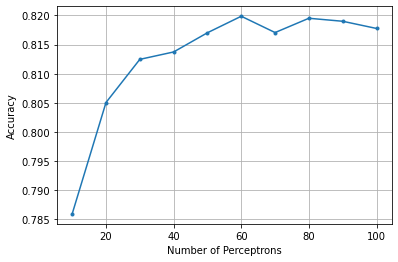

In [27]:
xaxis_perceptrons = [10,20,30,40,50,60,70,80,90,100]
plt.plot(xaxis_perceptrons,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Perceptrons')
plt.grid()

plt.savefig("Figures/No.OfPerceptron_LSTM.png")
plt.show()

In [25]:
#Layers Tuning for LSTM Layer

def create_model(No_Of_layers):
    model = Sequential()
    
    if No_Of_layers == 1:
        model.add(LSTM(units=60, input_shape=(1, 11), activation='relu'))
        model.add(Dropout(0.2))
    elif No_Of_layers == 2:
        model.add(LSTM(units=60, input_shape=(1, 11), return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=60, activation='relu'))
        model.add(Dropout(0.2))
    elif No_Of_layers == 3:
        model.add(LSTM(units=60, input_shape=(1, 11), return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=60,  return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=60, activation='relu'))
        model.add(Dropout(0.2))
    elif No_Of_layers == 4:
        model.add(LSTM(units=60, input_shape=(1, 11), return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=60,  return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=60,  return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=60, activation='relu'))
        model.add(Dropout(0.2))
    elif No_Of_layers == 5:
        model.add(LSTM(units=60, input_shape=(1, 11), return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=60,  return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=60,  return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=60,  return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=60, activation='relu'))
        model.add(Dropout(0.2))    
    
    # Add an output layer 
    model.add(Dense(8, activation='softmax'))
    #compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
    return model

model = KerasClassifier(build_fn=create_model, verbose=1, epochs = 35, batch_size = 64)

parameters = {
    #'unit': [60],
    'No_Of_layers': [1,2,3,4,5]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3)

grid_search = grid_search.fit(X_train_L, y_train_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

C:\Users\f190806\AppData\Local\Temp\2/ipykernel_5996/829844154.py:48: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, verbose=1, epochs = 35, batch_size = 64)


Epoch 1/35
3343/3343 [==============================] - 13s 3ms/step - loss: 0.9880 - accuracy: 0.6896
Epoch 2/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.8201 - accuracy: 0.7570
Epoch 3/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7790 - accuracy: 0.7713
Epoch 4/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7597 - accuracy: 0.7784
Epoch 5/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7444 - accuracy: 0.7822
Epoch 6/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7338 - accuracy: 0.7865
Epoch 7/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7217 - accuracy: 0.7884
Epoch 8/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7127 - accuracy: 0.7912
Epoch 9/35
3343/3343 [==============================] - 10s 3ms/step - loss: 0.7047 - accuracy: 0.7928 0s - l
Epoch 10/35
3343/3343 [==============================] - 10s 3ms/s

3343/3343 [==============================] - 16s 5ms/step - loss: 0.6519 - accuracy: 0.8074
Epoch 8/35
3343/3343 [==============================] - 16s 5ms/step - loss: 0.6497 - accuracy: 0.8080
Epoch 9/35
3343/3343 [==============================] - 16s 5ms/step - loss: 0.6446 - accuracy: 0.8092
Epoch 10/35
3343/3343 [==============================] - 16s 5ms/step - loss: 0.6411 - accuracy: 0.8101
Epoch 11/35
3343/3343 [==============================] - 16s 5ms/step - loss: 0.6386 - accuracy: 0.8101
Epoch 12/35
3343/3343 [==============================] - 16s 5ms/step - loss: 0.6338 - accuracy: 0.8116
Epoch 13/35
3343/3343 [==============================] - 16s 5ms/step - loss: 0.6331 - accuracy: 0.8119
Epoch 14/35
3343/3343 [==============================] - 16s 5ms/step - loss: 0.6308 - accuracy: 0.8116
Epoch 15/35
3343/3343 [==============================] - 16s 5ms/step - loss: 0.6291 - accuracy: 0.8124
Epoch 16/35
3343/3343 [==============================] - 16s 5ms/step - loss: 

3343/3343 [==============================] - 22s 7ms/step - loss: 0.6603 - accuracy: 0.8015
Epoch 7/35
3343/3343 [==============================] - 22s 7ms/step - loss: 0.6564 - accuracy: 0.8029
Epoch 8/35
3343/3343 [==============================] - 22s 7ms/step - loss: 0.6523 - accuracy: 0.8038
Epoch 9/35
3343/3343 [==============================] - 22s 7ms/step - loss: 0.6490 - accuracy: 0.8052
Epoch 10/35
3343/3343 [==============================] - 22s 7ms/step - loss: 0.6456 - accuracy: 0.8067
Epoch 11/35
3343/3343 [==============================] - 22s 7ms/step - loss: 0.6424 - accuracy: 0.8075
Epoch 12/35
3343/3343 [==============================] - 22s 7ms/step - loss: 0.6415 - accuracy: 0.8073
Epoch 13/35
3343/3343 [==============================] - 22s 7ms/step - loss: 0.6388 - accuracy: 0.8080
Epoch 14/35
3343/3343 [==============================] - 22s 7ms/step - loss: 0.6382 - accuracy: 0.8082
Epoch 15/35
3343/3343 [==============================] - 22s 7ms/step - loss: 0

Epoch 1/35
3343/3343 [==============================] - 39s 10ms/step - loss: 0.8721 - accuracy: 0.7295
Epoch 2/35
3343/3343 [==============================] - 35s 10ms/step - loss: 0.7290 - accuracy: 0.7767
Epoch 3/35
3343/3343 [==============================] - 35s 10ms/step - loss: 0.7049 - accuracy: 0.7870
Epoch 4/35
3343/3343 [==============================] - 35s 11ms/step - loss: 0.6905 - accuracy: 0.7925
Epoch 5/35
3343/3343 [==============================] - 35s 10ms/step - loss: 0.6823 - accuracy: 0.7947
Epoch 6/35
3343/3343 [==============================] - 35s 10ms/step - loss: 0.6754 - accuracy: 0.7967
Epoch 7/35
3343/3343 [==============================] - 35s 10ms/step - loss: 0.6715 - accuracy: 0.7994
Epoch 8/35
3343/3343 [==============================] - 35s 10ms/step - loss: 0.6661 - accuracy: 0.8006
Epoch 9/35
3343/3343 [==============================] - 35s 10ms/step - loss: 0.6636 - accuracy: 0.8020
Epoch 10/35
3343/3343 [==============================] - 35s 10m

5014/5014 [==============================] - 24s 5ms/step - loss: 0.6018 - accuracy: 0.8192
Epoch 31/35
5014/5014 [==============================] - 24s 5ms/step - loss: 0.6016 - accuracy: 0.8197
Epoch 32/35
5014/5014 [==============================] - 24s 5ms/step - loss: 0.6006 - accuracy: 0.8196
Epoch 33/35
5014/5014 [==============================] - 24s 5ms/step - loss: 0.5988 - accuracy: 0.8197
Epoch 34/35
5014/5014 [==============================] - 24s 5ms/step - loss: 0.5995 - accuracy: 0.8196
Epoch 35/35
5014/5014 [==============================] - 24s 5ms/step - loss: 0.5986 - accuracy: 0.8207
Best Results with Grid Search:
0.8242446906308918
{'No_Of_layers': 2}


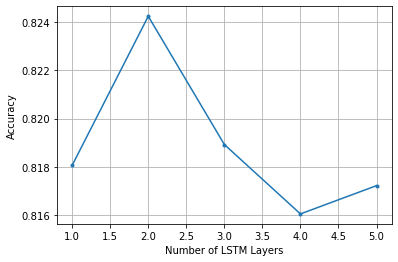

In [26]:
xaxis_LSTM_layers =[1,2,3,4,5]
plt.plot(xaxis_LSTM_layers,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of LSTM Layers')
plt.grid()

plt.savefig("Figures/No.OfLayers_LSTM.png")
plt.show()

In [24]:
#Layers Tuning for Dense Layer

def create_model(No_Of_layers):
    model = Sequential()
    # Add an input layer
    model.add(LSTM(units=60, input_shape=(1, 11), return_sequences = True, activation='relu'))
    model.add(Dropout(0.2))
    model.add(LSTM(units=60, activation='relu'))
    model.add(Dropout(0.2))

    for i in range(No_Of_layers):
        model.add(Dense(units=60, activation='relu'))
        model.add(Dropout(0.2))

    # Add an output layer 
    model.add(Dense(8, activation='softmax'))
    #compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
    return model

model = KerasClassifier(build_fn=create_model, verbose=1, epochs = 35, batch_size = 64)

parameters = {
    #'unit': [95],
    'No_Of_layers': [0,1,2,3,4,5]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3)

grid_search = grid_search.fit(X_train_L, y_train_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

C:\Users\f190806\AppData\Local\Temp\2\ipykernel_1140\1341314236.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=1, epochs = 35, batch_size = 64)


Epoch 1/35
3343/3343 [==============================] - 22s 5ms/step - loss: 0.8883 - accuracy: 0.7305
Epoch 2/35
3343/3343 [==============================] - 17s 5ms/step - loss: 0.7308 - accuracy: 0.7809
Epoch 3/35
3343/3343 [==============================] - 17s 5ms/step - loss: 0.6992 - accuracy: 0.7938
Epoch 4/35
3343/3343 [==============================] - 17s 5ms/step - loss: 0.6828 - accuracy: 0.7986
Epoch 5/35
3343/3343 [==============================] - 17s 5ms/step - loss: 0.6691 - accuracy: 0.8035
Epoch 6/35
3343/3343 [==============================] - 17s 5ms/step - loss: 0.6626 - accuracy: 0.8050
Epoch 7/35
3343/3343 [==============================] - 17s 5ms/step - loss: 0.6582 - accuracy: 0.8071
Epoch 8/35
3343/3343 [==============================] - 17s 5ms/step - loss: 0.6526 - accuracy: 0.8083
Epoch 9/35
3343/3343 [==============================] - 17s 5ms/step - loss: 0.6489 - accuracy: 0.8091
Epoch 10/35
3343/3343 [==============================] - 17s 5ms/step - l

Epoch 1/35
3343/3343 [==============================] - 19s 5ms/step - loss: 0.8813 - accuracy: 0.7331
Epoch 2/35
3343/3343 [==============================] - 17s 5ms/step - loss: 0.7328 - accuracy: 0.7809
Epoch 3/35
3343/3343 [==============================] - 17s 5ms/step - loss: 0.7000 - accuracy: 0.7918
Epoch 4/35
3343/3343 [==============================] - 17s 5ms/step - loss: 0.6819 - accuracy: 0.7987
Epoch 5/35
3343/3343 [==============================] - 17s 5ms/step - loss: 0.6718 - accuracy: 0.8014
Epoch 6/35
3343/3343 [==============================] - 17s 5ms/step - loss: 0.6624 - accuracy: 0.8035
Epoch 7/35
3343/3343 [==============================] - 17s 5ms/step - loss: 0.6575 - accuracy: 0.8053
Epoch 8/35
3343/3343 [==============================] - 17s 5ms/step - loss: 0.6526 - accuracy: 0.8066
Epoch 9/35
3343/3343 [==============================] - 17s 5ms/step - loss: 0.6488 - accuracy: 0.8086
Epoch 10/35
3343/3343 [==============================] - 17s 5ms/step - l

3343/3343 [==============================] - 18s 5ms/step - loss: 0.6999 - accuracy: 0.7889
Epoch 4/35
3343/3343 [==============================] - 18s 5ms/step - loss: 0.6874 - accuracy: 0.7930
Epoch 5/35
3343/3343 [==============================] - 18s 5ms/step - loss: 0.6793 - accuracy: 0.7951
Epoch 6/35
3343/3343 [==============================] - 18s 5ms/step - loss: 0.6732 - accuracy: 0.7964
Epoch 7/35
3343/3343 [==============================] - 18s 5ms/step - loss: 0.6658 - accuracy: 0.7991
Epoch 8/35
3343/3343 [==============================] - 18s 5ms/step - loss: 0.6604 - accuracy: 0.8006
Epoch 9/35
3343/3343 [==============================] - 18s 5ms/step - loss: 0.6607 - accuracy: 0.7995
Epoch 10/35
3343/3343 [==============================] - 18s 5ms/step - loss: 0.6541 - accuracy: 0.8016
Epoch 11/35
3343/3343 [==============================] - 18s 5ms/step - loss: 0.6532 - accuracy: 0.8020
Epoch 12/35
3343/3343 [==============================] - 18s 5ms/step - loss: 0.65

3343/3343 [==============================] - 18s 5ms/step - loss: 0.6802 - accuracy: 0.7946
Epoch 6/35
3343/3343 [==============================] - 18s 6ms/step - loss: 0.6730 - accuracy: 0.7968
Epoch 7/35
3343/3343 [==============================] - 18s 5ms/step - loss: 0.6676 - accuracy: 0.7990
Epoch 8/35
3343/3343 [==============================] - 18s 5ms/step - loss: 0.6631 - accuracy: 0.7995
Epoch 9/35
3343/3343 [==============================] - 18s 5ms/step - loss: 0.6628 - accuracy: 0.7990
Epoch 10/35
3343/3343 [==============================] - 18s 5ms/step - loss: 0.6571 - accuracy: 0.8015
Epoch 11/35
3343/3343 [==============================] - 18s 6ms/step - loss: 0.6561 - accuracy: 0.8017
Epoch 12/35
3343/3343 [==============================] - 18s 6ms/step - loss: 0.6537 - accuracy: 0.8020
Epoch 13/35
3343/3343 [==============================] - 18s 5ms/step - loss: 0.6499 - accuracy: 0.8043
Epoch 14/35
3343/3343 [==============================] - 18s 5ms/step - loss: 0.

3343/3343 [==============================] - 18s 6ms/step - loss: 0.6681 - accuracy: 0.7981
Epoch 8/35
3343/3343 [==============================] - 19s 6ms/step - loss: 0.6656 - accuracy: 0.7996
Epoch 9/35
3343/3343 [==============================] - 18s 6ms/step - loss: 0.6634 - accuracy: 0.7998
Epoch 10/35
3343/3343 [==============================] - 19s 6ms/step - loss: 0.6609 - accuracy: 0.8005
Epoch 11/35
3343/3343 [==============================] - 18s 5ms/step - loss: 0.6596 - accuracy: 0.8004
Epoch 12/35
3343/3343 [==============================] - 18s 6ms/step - loss: 0.6573 - accuracy: 0.8012
Epoch 13/35
3343/3343 [==============================] - 18s 6ms/step - loss: 0.6558 - accuracy: 0.8022
Epoch 14/35
3343/3343 [==============================] - 18s 6ms/step - loss: 0.6543 - accuracy: 0.8018
Epoch 15/35
3343/3343 [==============================] - 18s 6ms/step - loss: 0.6520 - accuracy: 0.8029
Epoch 16/35
3343/3343 [==============================] - 18s 5ms/step - loss: 

5014/5014 [==============================] - 25s 5ms/step - loss: 0.6307 - accuracy: 0.8122
Epoch 10/35
5014/5014 [==============================] - 25s 5ms/step - loss: 0.6277 - accuracy: 0.8130
Epoch 11/35
5014/5014 [==============================] - 25s 5ms/step - loss: 0.6251 - accuracy: 0.8135
Epoch 12/35
5014/5014 [==============================] - 25s 5ms/step - loss: 0.6228 - accuracy: 0.8139
Epoch 13/35
5014/5014 [==============================] - 25s 5ms/step - loss: 0.6194 - accuracy: 0.8143
Epoch 14/35
5014/5014 [==============================] - 25s 5ms/step - loss: 0.6177 - accuracy: 0.8144
Epoch 15/35
5014/5014 [==============================] - 25s 5ms/step - loss: 0.6160 - accuracy: 0.8154
Epoch 16/35
5014/5014 [==============================] - 25s 5ms/step - loss: 0.6139 - accuracy: 0.8159
Epoch 17/35
5014/5014 [==============================] - 25s 5ms/step - loss: 0.6124 - accuracy: 0.8160
Epoch 18/35
5014/5014 [==============================] - 25s 5ms/step - loss

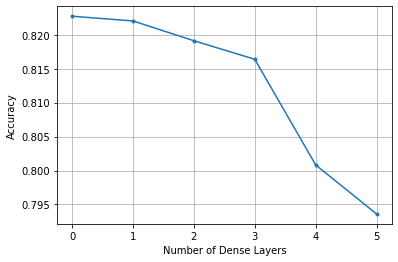

In [25]:
xaxis_layers = [0,1,2,3,4,5]
plt.plot(xaxis_layers,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Dense Layers')
plt.grid()

plt.savefig("Figures/No.OfLayers_Dense.png")
plt.show()

In [ ]:
#Perceptron Tuning for Dense Layer

def create_model(unit):
    model = Sequential()
    model.add(LSTM(units=60, input_shape=(1, 11), return_sequences = True, activation='relu'))
    model.add(Dropout(0.2))
    model.add(LSTM(units=60, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0, epochs = 35, batch_size = 64)

parameters = {
    'unit': [10,20,30,40,50,60,70,80,90,100],
    #'activation': ['relu','tanh'], 
    #'solver': ['adam','sgd'], 
    #'last_act': ['sigmoid','softmax'],
    #'epochs': [70,100],
    #'batch_size': [5,10] 
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3)

grid_search = grid_search.fit(X_train_L, y_train_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

In [ ]:
xaxis_perceptrons = [10,20,30,40,50,60,70,80,90,100]
plt.plot(xaxis_perceptrons,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Perceptrons in Dense layer')
plt.grid()

plt.savefig("Figures/No.OfPerceptron_Dense.png")
plt.show()

In [24]:
#Epochs Tuning

def create_model():
    model = Sequential()
    model.add(LSTM(units=60, input_shape=(1, 11), return_sequences = True, activation='relu'))
    model.add(Dropout(0.2))
    model.add(LSTM(units=60, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='softmax'))
    #compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0, batch_size = 64)

parameters = {
    #'unit': [95],
    'epochs': [30,40,50,60,70,80]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3)

grid_search = grid_search.fit(X_train_L, y_train_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

C:\Users\f190806\AppData\Local\Temp\2\ipykernel_7160\1102260081.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0, batch_size = 64)


3343/3343 [==============================] - 6s 2ms/step
Best Results with Grid Search:
0.8274887424235343
{'epochs': 80}


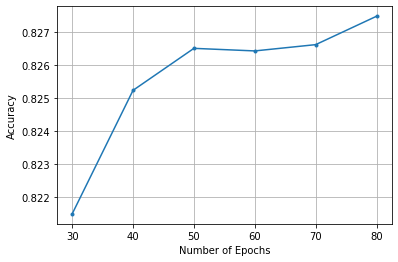

In [25]:
xaxis_epochs = [30,40,50,60,70,80]
plt.plot(xaxis_epochs,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.grid()

plt.savefig("Figures/No.OfEpochs_LSTM.png")
plt.show()

In [26]:
#Batch Size Tuning

def create_model():
    model = Sequential()
    model.add(LSTM(units=60, input_shape=(1, 11), return_sequences = True, activation='relu'))
    model.add(Dropout(0.2))
    model.add(LSTM(units=60, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='softmax'))
    #compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0, epochs = 80)

parameters = {
    #'unit': [95],
    'batch_size': [30,40,50,60,70,80]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3)

grid_search = grid_search.fit(X_train_L, y_train_L)

print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

C:\Users\f190806\AppData\Local\Temp\2\ipykernel_7160\2794914093.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0, epochs = 80)


3343/3343 [==============================] - 7s 2ms/step
Best Results with Grid Search:
0.8288692562987894
{'batch_size': 30}


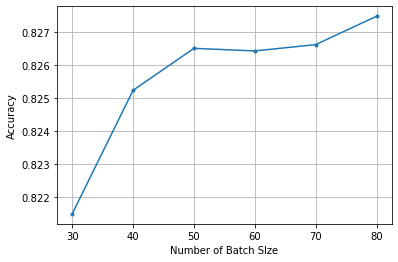

In [27]:
xaxis_batch = [30,40,50,60,70,80]
plt.plot(xaxis_batch,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Batch SIze')
plt.grid()

plt.savefig("Figures/No.OfBatch_LSTM.png")
plt.show()

In [28]:
#Tuning with Grid Seaerch CV

def create_model(unit, solver, dropout, activation):
    model = Sequential()
    model.add(LSTM(units=unit, input_shape=(1, 11), return_sequences = True, activation=activation))
    model.add(Dropout(dropout))
    model.add(LSTM(units=unit, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(8, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=solver, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

parameters = {
    'unit': [60,80],
    'dropout': [0.1,0.2],
    'activation': ['relu','tanh'], 
    #'solver': ['adam','sgd'], 
    'solver': ['adam','Adamax','Nadam'],
    'epochs': [80,100],
    'batch_size': [80,100]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3)

grid_search = grid_search.fit(X_train_L, y_train_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred = grid_search.predict(X_test_L)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(y_test_L, y_pred)))
print(confusion_matrix(y_test_L,y_pred))
print(classification_report(y_test_L,y_pred))

C:\Users\f190806\AppData\Local\Temp\2\ipykernel_7160\3782331227.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


3343/3343 [==============================] - 6s 2ms/step


3343/3343 [==============================] - 8s 2ms/step


3343/3343 [==============================] - 8s 2ms/step


3343/3343 [==============================] - 8s 2ms/step


3343/3343 [==============================] - 7s 2ms/step


3343/3343 [==============================] - 8s 2ms/step


3343/3343 [==============================] - 7s 2ms/step


3343/3343 [==============================] - 7s 2ms/step


3343/3343 [==============================] - 6s 2ms/step
Best Results with Grid Search:
0.8341077299428162
{'activation': 'tanh', 'batch_size': 80, 'dropout': 0.1, 'epochs': 100, 'solver': 'adam', 'unit': 80}
2507/2507 [==============================] - 5s 2ms/step

Accuracy Score  on test data: 0.8302627642600718
[[ 2410    62   318  4154    99    39     6    10]
 [   75  3788    49   463   418   216    16     7]
 [  902    60  4525   619   775    36     4     9]
 [  450   291   442 46705   638   218    54    98]
 [   73   356   458   704  5374    59     8     9]
 [   21   348    32   296    55  2392     1     9]
 [   11    11     7    74     7     2   657    28]
 [    7    19    13   133    17   223   108   756]]
              precision    recall  f1-score   support

           0       0.61      0.34      0.44      7098
           1       0.77      0.75      0.76      5032
           2       0.77      0.65      0.71      6930
           3       0.88      0.96      0.92     48896
    

In [29]:
print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred = grid_search.predict(X_test_L)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(y_test_L, y_pred)))
print(confusion_matrix(y_test_L,y_pred))
print(classification_report(y_test_L,y_pred))

Best Results with Grid Search:
0.8341077299428162
{'activation': 'tanh', 'batch_size': 80, 'dropout': 0.1, 'epochs': 100, 'solver': 'adam', 'unit': 80}
2507/2507 [==============================] - 4s 2ms/step

Accuracy Score  on test data: 0.8302627642600718
[[ 2410    62   318  4154    99    39     6    10]
 [   75  3788    49   463   418   216    16     7]
 [  902    60  4525   619   775    36     4     9]
 [  450   291   442 46705   638   218    54    98]
 [   73   356   458   704  5374    59     8     9]
 [   21   348    32   296    55  2392     1     9]
 [   11    11     7    74     7     2   657    28]
 [    7    19    13   133    17   223   108   756]]
              precision    recall  f1-score   support

           0       0.61      0.34      0.44      7098
           1       0.77      0.75      0.76      5032
           2       0.77      0.65      0.71      6930
           3       0.88      0.96      0.92     48896
           4       0.73      0.76      0.75      7041
       

In [30]:
# 1 LSTM Layer (input), 3 Dense Hidden Layers

model = Sequential()
model.add(LSTM(units=80, input_shape=(1, 11), return_sequences = True, activation='tanh'))
model.add(Dropout(0.1))
model.add(LSTM(units=80, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_L, y_train_L, epochs=100, batch_size=80, verbose=2, validation_data=(X_test_L, y_test_L))

Epoch 1/100
4012/4012 - 21s - loss: 0.7663 - accuracy: 0.7686 - val_loss: 0.6563 - val_accuracy: 0.7981 - 21s/epoch - 5ms/step
Epoch 2/100
4012/4012 - 15s - loss: 0.6549 - accuracy: 0.8027 - val_loss: 0.6320 - val_accuracy: 0.8102 - 15s/epoch - 4ms/step
Epoch 3/100
4012/4012 - 15s - loss: 0.6380 - accuracy: 0.8081 - val_loss: 0.6238 - val_accuracy: 0.8112 - 15s/epoch - 4ms/step
Epoch 4/100
4012/4012 - 15s - loss: 0.6295 - accuracy: 0.8107 - val_loss: 0.6182 - val_accuracy: 0.8089 - 15s/epoch - 4ms/step
Epoch 5/100
4012/4012 - 15s - loss: 0.6237 - accuracy: 0.8124 - val_loss: 0.6077 - val_accuracy: 0.8161 - 15s/epoch - 4ms/step
Epoch 6/100
4012/4012 - 15s - loss: 0.6170 - accuracy: 0.8138 - val_loss: 0.6007 - val_accuracy: 0.8171 - 15s/epoch - 4ms/step
Epoch 7/100
4012/4012 - 15s - loss: 0.6111 - accuracy: 0.8147 - val_loss: 0.5967 - val_accuracy: 0.8175 - 15s/epoch - 4ms/step
Epoch 8/100
4012/4012 - 15s - loss: 0.6058 - accuracy: 0.8160 - val_loss: 0.5990 - val_accuracy: 0.8147 - 15s/e

4012/4012 - 15s - loss: 0.5476 - accuracy: 0.8304 - val_loss: 0.5361 - val_accuracy: 0.8315 - 15s/epoch - 4ms/step
Epoch 66/100
4012/4012 - 15s - loss: 0.5470 - accuracy: 0.8300 - val_loss: 0.5380 - val_accuracy: 0.8331 - 15s/epoch - 4ms/step
Epoch 67/100
4012/4012 - 15s - loss: 0.5457 - accuracy: 0.8302 - val_loss: 0.5372 - val_accuracy: 0.8324 - 15s/epoch - 4ms/step
Epoch 68/100
4012/4012 - 15s - loss: 0.5463 - accuracy: 0.8304 - val_loss: 0.5390 - val_accuracy: 0.8314 - 15s/epoch - 4ms/step
Epoch 69/100
4012/4012 - 15s - loss: 0.5467 - accuracy: 0.8300 - val_loss: 0.5407 - val_accuracy: 0.8308 - 15s/epoch - 4ms/step
Epoch 70/100
4012/4012 - 15s - loss: 0.5460 - accuracy: 0.8302 - val_loss: 0.5405 - val_accuracy: 0.8317 - 15s/epoch - 4ms/step
Epoch 71/100
4012/4012 - 15s - loss: 0.5456 - accuracy: 0.8305 - val_loss: 0.5359 - val_accuracy: 0.8334 - 15s/epoch - 4ms/step
Epoch 72/100
4012/4012 - 15s - loss: 0.5452 - accuracy: 0.8304 - val_loss: 0.5393 - val_accuracy: 0.8314 - 15s/epoch 

In [32]:
loss, accuracy = model.evaluate(X_test_L, y_test_L)
print("Loss:" + str(loss))
print("Accuracy:" + str(accuracy))

2507/2507 [==============================] - 6s 2ms/step - loss: 0.5360 - accuracy: 0.8328
Loss:0.5359705686569214
Accuracy:0.8327931761741638


In [33]:
model.summary()

Model: "sequential_327"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_654 (LSTM)             (None, 1, 80)             29440     
                                                                 
 dropout_654 (Dropout)       (None, 1, 80)             0         
                                                                 
 lstm_655 (LSTM)             (None, 80)                51520     
                                                                 
 dropout_655 (Dropout)       (None, 80)                0         
                                                                 
 dense_327 (Dense)           (None, 8)                 648       
                                                                 
Total params: 81,608
Trainable params: 81,608
Non-trainable params: 0
_________________________________________________________________


### Conv-LSTM 

In [23]:
# LSTM training (label encoder + shape)
encoder = LabelEncoder()
encoder.fit(trainY)
y_train_L = encoder.transform(trainY) #for sparse_categorical
X_train_L = trainX.reshape((-1, 1, trainX.shape[1]))

In [24]:
# LSTM testing (label encoder + shape)
encoder = LabelEncoder()
encoder.fit(testY)
y_test_L = encoder.transform(testY) #for sparse_categorical
X_test_L = testX.reshape((-1, 1, testX.shape[1]))

In [25]:
print(X_train_L.shape)
print(y_train_L.shape)
print(X_test_L.shape)
print(y_test_L.shape)

(320895, 1, 11)
(320895,)
(80224, 1, 11)
(80224,)


In [37]:
# X_M.shape

In [38]:
# X1 = X_M.reshape((-1, 1, 11))

In [39]:
# X1.shape

In [40]:
# len(np.unique(y))

In [43]:
# encoder = LabelEncoder()
# encoder.fit(y)
# y_E = encoder.transform(y)

In [41]:
# y_E.shape

In [42]:
# (trainX, testX, trainY, testY) = train_test_split(X1, y_E, test_size = 0.20, random_state = 40)

In [44]:
#CNN Filters

def create_model(nb_filters):
    model = Sequential()
    model.add(Conv1D(filters=nb_filters, kernel_size=3, padding='same', activation='tanh'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(0.2))
    model.add(LSTM(units=80, input_shape=(1, 11), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=2, epochs = 100, batch_size = 80)

parameters = {
    'nb_filters': [100,125,150,175,200,225,250,300],
    #'unit': [10,20,30,40,50,60,70,80,90,100],
    #'activation': ['relu','tanh'], 
    #'solver': ['adam','sgd'], 
    #'last_act': ['sigmoid','softmax'],
    #'epochs': [70,100],
    #'batch_size': [5,10] 
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3) # run 1 job at a time

grid_search = grid_search.fit(X_train_L, y_train_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Epoch 1/100


C:\Users\f190806\AppData\Local\Temp\2\ipykernel_7160\893372933.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=2, epochs = 100, batch_size = 80)


2675/2675 - 11s - loss: 0.7949 - accuracy: 0.7579 - 11s/epoch - 4ms/step
Epoch 2/100
2675/2675 - 8s - loss: 0.6762 - accuracy: 0.7966 - 8s/epoch - 3ms/step
Epoch 3/100
2675/2675 - 8s - loss: 0.6557 - accuracy: 0.8030 - 8s/epoch - 3ms/step
Epoch 4/100
2675/2675 - 8s - loss: 0.6443 - accuracy: 0.8071 - 8s/epoch - 3ms/step
Epoch 5/100
2675/2675 - 8s - loss: 0.6363 - accuracy: 0.8095 - 8s/epoch - 3ms/step
Epoch 6/100
2675/2675 - 8s - loss: 0.6306 - accuracy: 0.8108 - 8s/epoch - 3ms/step
Epoch 7/100
2675/2675 - 8s - loss: 0.6244 - accuracy: 0.8120 - 8s/epoch - 3ms/step
Epoch 8/100
2675/2675 - 8s - loss: 0.6191 - accuracy: 0.8136 - 8s/epoch - 3ms/step
Epoch 9/100
2675/2675 - 8s - loss: 0.6158 - accuracy: 0.8141 - 8s/epoch - 3ms/step
Epoch 10/100
2675/2675 - 8s - loss: 0.6126 - accuracy: 0.8144 - 8s/epoch - 3ms/step
Epoch 11/100
2675/2675 - 8s - loss: 0.6092 - accuracy: 0.8148 - 8s/epoch - 3ms/step
Epoch 12/100
2675/2675 - 8s - loss: 0.6060 - accuracy: 0.8148 - 8s/epoch - 3ms/step
Epoch 13/10

Epoch 99/100
2675/2675 - 8s - loss: 0.5596 - accuracy: 0.8275 - 8s/epoch - 3ms/step
Epoch 100/100
2675/2675 - 8s - loss: 0.5599 - accuracy: 0.8274 - 8s/epoch - 3ms/step
3343/3343 [==============================] - 6s 2ms/step
Epoch 1/100
2675/2675 - 11s - loss: 0.7927 - accuracy: 0.7581 - 11s/epoch - 4ms/step
Epoch 2/100
2675/2675 - 8s - loss: 0.6742 - accuracy: 0.7962 - 8s/epoch - 3ms/step
Epoch 3/100
2675/2675 - 8s - loss: 0.6539 - accuracy: 0.8028 - 8s/epoch - 3ms/step
Epoch 4/100
2675/2675 - 8s - loss: 0.6423 - accuracy: 0.8063 - 8s/epoch - 3ms/step
Epoch 5/100
2675/2675 - 8s - loss: 0.6331 - accuracy: 0.8095 - 8s/epoch - 3ms/step
Epoch 6/100
2675/2675 - 8s - loss: 0.6272 - accuracy: 0.8112 - 8s/epoch - 3ms/step
Epoch 7/100
2675/2675 - 8s - loss: 0.6228 - accuracy: 0.8120 - 8s/epoch - 3ms/step
Epoch 8/100
2675/2675 - 8s - loss: 0.6174 - accuracy: 0.8131 - 8s/epoch - 3ms/step
Epoch 9/100
2675/2675 - 8s - loss: 0.6130 - accuracy: 0.8139 - 8s/epoch - 3ms/step
Epoch 10/100
2675/2675 - 

Epoch 96/100
2675/2675 - 8s - loss: 0.5583 - accuracy: 0.8276 - 8s/epoch - 3ms/step
Epoch 97/100
2675/2675 - 8s - loss: 0.5581 - accuracy: 0.8278 - 8s/epoch - 3ms/step
Epoch 98/100
2675/2675 - 8s - loss: 0.5584 - accuracy: 0.8274 - 8s/epoch - 3ms/step
Epoch 99/100
2675/2675 - 8s - loss: 0.5580 - accuracy: 0.8274 - 8s/epoch - 3ms/step
Epoch 100/100
2675/2675 - 8s - loss: 0.5564 - accuracy: 0.8285 - 8s/epoch - 3ms/step
3343/3343 [==============================] - 6s 2ms/step
Epoch 1/100
2675/2675 - 11s - loss: 0.7963 - accuracy: 0.7584 - 11s/epoch - 4ms/step
Epoch 2/100
2675/2675 - 8s - loss: 0.6745 - accuracy: 0.7964 - 8s/epoch - 3ms/step
Epoch 3/100
2675/2675 - 8s - loss: 0.6559 - accuracy: 0.8021 - 8s/epoch - 3ms/step
Epoch 4/100
2675/2675 - 8s - loss: 0.6428 - accuracy: 0.8072 - 8s/epoch - 3ms/step
Epoch 5/100
2675/2675 - 8s - loss: 0.6356 - accuracy: 0.8091 - 8s/epoch - 3ms/step
Epoch 6/100
2675/2675 - 8s - loss: 0.6285 - accuracy: 0.8119 - 8s/epoch - 3ms/step
Epoch 7/100
2675/2675 

Epoch 93/100
2675/2675 - 8s - loss: 0.5606 - accuracy: 0.8266 - 8s/epoch - 3ms/step
Epoch 94/100
2675/2675 - 8s - loss: 0.5612 - accuracy: 0.8265 - 8s/epoch - 3ms/step
Epoch 95/100
2675/2675 - 8s - loss: 0.5609 - accuracy: 0.8274 - 8s/epoch - 3ms/step
Epoch 96/100
2675/2675 - 8s - loss: 0.5601 - accuracy: 0.8270 - 8s/epoch - 3ms/step
Epoch 97/100
2675/2675 - 8s - loss: 0.5609 - accuracy: 0.8270 - 8s/epoch - 3ms/step
Epoch 98/100
2675/2675 - 8s - loss: 0.5605 - accuracy: 0.8268 - 8s/epoch - 3ms/step
Epoch 99/100
2675/2675 - 8s - loss: 0.5609 - accuracy: 0.8262 - 8s/epoch - 3ms/step
Epoch 100/100
2675/2675 - 8s - loss: 0.5605 - accuracy: 0.8272 - 8s/epoch - 3ms/step
3343/3343 [==============================] - 6s 2ms/step
Epoch 1/100
2675/2675 - 10s - loss: 0.7770 - accuracy: 0.7647 - 10s/epoch - 4ms/step
Epoch 2/100
2675/2675 - 8s - loss: 0.6689 - accuracy: 0.7982 - 8s/epoch - 3ms/step
Epoch 3/100
2675/2675 - 8s - loss: 0.6504 - accuracy: 0.8050 - 8s/epoch - 3ms/step
Epoch 4/100
2675/26

Epoch 90/100
2675/2675 - 8s - loss: 0.5619 - accuracy: 0.8269 - 8s/epoch - 3ms/step
Epoch 91/100
2675/2675 - 8s - loss: 0.5615 - accuracy: 0.8272 - 8s/epoch - 3ms/step
Epoch 92/100
2675/2675 - 8s - loss: 0.5611 - accuracy: 0.8271 - 8s/epoch - 3ms/step
Epoch 93/100
2675/2675 - 8s - loss: 0.5604 - accuracy: 0.8272 - 8s/epoch - 3ms/step
Epoch 94/100
2675/2675 - 8s - loss: 0.5614 - accuracy: 0.8270 - 8s/epoch - 3ms/step
Epoch 95/100
2675/2675 - 8s - loss: 0.5611 - accuracy: 0.8269 - 8s/epoch - 3ms/step
Epoch 96/100
2675/2675 - 8s - loss: 0.5607 - accuracy: 0.8269 - 8s/epoch - 3ms/step
Epoch 97/100
2675/2675 - 8s - loss: 0.5599 - accuracy: 0.8271 - 8s/epoch - 3ms/step
Epoch 98/100
2675/2675 - 8s - loss: 0.5605 - accuracy: 0.8270 - 8s/epoch - 3ms/step
Epoch 99/100
2675/2675 - 8s - loss: 0.5602 - accuracy: 0.8269 - 8s/epoch - 3ms/step
Epoch 100/100
2675/2675 - 8s - loss: 0.5605 - accuracy: 0.8273 - 8s/epoch - 3ms/step
3343/3343 [==============================] - 6s 2ms/step
Epoch 1/100
2675/2

Epoch 87/100
2675/2675 - 8s - loss: 0.5575 - accuracy: 0.8277 - 8s/epoch - 3ms/step
Epoch 88/100
2675/2675 - 8s - loss: 0.5574 - accuracy: 0.8275 - 8s/epoch - 3ms/step
Epoch 89/100
2675/2675 - 8s - loss: 0.5580 - accuracy: 0.8274 - 8s/epoch - 3ms/step
Epoch 90/100
2675/2675 - 8s - loss: 0.5573 - accuracy: 0.8277 - 8s/epoch - 3ms/step
Epoch 91/100
2675/2675 - 8s - loss: 0.5570 - accuracy: 0.8272 - 8s/epoch - 3ms/step
Epoch 92/100
2675/2675 - 8s - loss: 0.5563 - accuracy: 0.8275 - 8s/epoch - 3ms/step
Epoch 93/100
2675/2675 - 8s - loss: 0.5565 - accuracy: 0.8285 - 8s/epoch - 3ms/step
Epoch 94/100
2675/2675 - 8s - loss: 0.5566 - accuracy: 0.8280 - 8s/epoch - 3ms/step
Epoch 95/100
2675/2675 - 8s - loss: 0.5574 - accuracy: 0.8278 - 8s/epoch - 3ms/step
Epoch 96/100
2675/2675 - 8s - loss: 0.5566 - accuracy: 0.8278 - 8s/epoch - 3ms/step
Epoch 97/100
2675/2675 - 8s - loss: 0.5562 - accuracy: 0.8277 - 8s/epoch - 3ms/step
Epoch 98/100
2675/2675 - 8s - loss: 0.5570 - accuracy: 0.8277 - 8s/epoch - 3

Epoch 84/100
2675/2675 - 8s - loss: 0.5588 - accuracy: 0.8275 - 8s/epoch - 3ms/step
Epoch 85/100
2675/2675 - 8s - loss: 0.5589 - accuracy: 0.8280 - 8s/epoch - 3ms/step
Epoch 86/100
2675/2675 - 8s - loss: 0.5583 - accuracy: 0.8282 - 8s/epoch - 3ms/step
Epoch 87/100
2675/2675 - 8s - loss: 0.5588 - accuracy: 0.8281 - 8s/epoch - 3ms/step
Epoch 88/100
2675/2675 - 8s - loss: 0.5584 - accuracy: 0.8277 - 8s/epoch - 3ms/step
Epoch 89/100
2675/2675 - 8s - loss: 0.5582 - accuracy: 0.8276 - 8s/epoch - 3ms/step
Epoch 90/100
2675/2675 - 8s - loss: 0.5586 - accuracy: 0.8279 - 8s/epoch - 3ms/step
Epoch 91/100
2675/2675 - 8s - loss: 0.5585 - accuracy: 0.8279 - 8s/epoch - 3ms/step
Epoch 92/100
2675/2675 - 8s - loss: 0.5585 - accuracy: 0.8279 - 8s/epoch - 3ms/step
Epoch 93/100
2675/2675 - 8s - loss: 0.5572 - accuracy: 0.8278 - 8s/epoch - 3ms/step
Epoch 94/100
2675/2675 - 8s - loss: 0.5578 - accuracy: 0.8277 - 8s/epoch - 3ms/step
Epoch 95/100
2675/2675 - 8s - loss: 0.5584 - accuracy: 0.8269 - 8s/epoch - 3

Epoch 81/100
2675/2675 - 8s - loss: 0.5631 - accuracy: 0.8270 - 8s/epoch - 3ms/step
Epoch 82/100
2675/2675 - 8s - loss: 0.5628 - accuracy: 0.8265 - 8s/epoch - 3ms/step
Epoch 83/100
2675/2675 - 8s - loss: 0.5619 - accuracy: 0.8272 - 8s/epoch - 3ms/step
Epoch 84/100
2675/2675 - 8s - loss: 0.5616 - accuracy: 0.8271 - 8s/epoch - 3ms/step
Epoch 85/100
2675/2675 - 8s - loss: 0.5628 - accuracy: 0.8267 - 8s/epoch - 3ms/step
Epoch 86/100
2675/2675 - 8s - loss: 0.5612 - accuracy: 0.8271 - 8s/epoch - 3ms/step
Epoch 87/100
2675/2675 - 8s - loss: 0.5613 - accuracy: 0.8268 - 8s/epoch - 3ms/step
Epoch 88/100
2675/2675 - 8s - loss: 0.5626 - accuracy: 0.8264 - 8s/epoch - 3ms/step
Epoch 89/100
2675/2675 - 8s - loss: 0.5613 - accuracy: 0.8269 - 8s/epoch - 3ms/step
Epoch 90/100
2675/2675 - 8s - loss: 0.5613 - accuracy: 0.8266 - 8s/epoch - 3ms/step
Epoch 91/100
2675/2675 - 8s - loss: 0.5610 - accuracy: 0.8267 - 8s/epoch - 3ms/step
Epoch 92/100
2675/2675 - 8s - loss: 0.5615 - accuracy: 0.8272 - 8s/epoch - 3

Epoch 78/100
2675/2675 - 8s - loss: 0.5587 - accuracy: 0.8272 - 8s/epoch - 3ms/step
Epoch 79/100
2675/2675 - 8s - loss: 0.5581 - accuracy: 0.8277 - 8s/epoch - 3ms/step
Epoch 80/100
2675/2675 - 8s - loss: 0.5579 - accuracy: 0.8277 - 8s/epoch - 3ms/step
Epoch 81/100
2675/2675 - 8s - loss: 0.5580 - accuracy: 0.8276 - 8s/epoch - 3ms/step
Epoch 82/100
2675/2675 - 8s - loss: 0.5584 - accuracy: 0.8274 - 8s/epoch - 3ms/step
Epoch 83/100
2675/2675 - 8s - loss: 0.5583 - accuracy: 0.8282 - 8s/epoch - 3ms/step
Epoch 84/100
2675/2675 - 8s - loss: 0.5572 - accuracy: 0.8272 - 8s/epoch - 3ms/step
Epoch 85/100
2675/2675 - 8s - loss: 0.5575 - accuracy: 0.8277 - 8s/epoch - 3ms/step
Epoch 86/100
2675/2675 - 8s - loss: 0.5574 - accuracy: 0.8280 - 8s/epoch - 3ms/step
Epoch 87/100
2675/2675 - 8s - loss: 0.5577 - accuracy: 0.8268 - 8s/epoch - 3ms/step
Epoch 88/100
2675/2675 - 8s - loss: 0.5566 - accuracy: 0.8280 - 8s/epoch - 3ms/step
Epoch 89/100
2675/2675 - 8s - loss: 0.5571 - accuracy: 0.8280 - 8s/epoch - 3

Epoch 75/100
2675/2675 - 8s - loss: 0.5608 - accuracy: 0.8264 - 8s/epoch - 3ms/step
Epoch 76/100
2675/2675 - 8s - loss: 0.5610 - accuracy: 0.8275 - 8s/epoch - 3ms/step
Epoch 77/100
2675/2675 - 8s - loss: 0.5609 - accuracy: 0.8270 - 8s/epoch - 3ms/step
Epoch 78/100
2675/2675 - 8s - loss: 0.5600 - accuracy: 0.8273 - 8s/epoch - 3ms/step
Epoch 79/100
2675/2675 - 8s - loss: 0.5603 - accuracy: 0.8269 - 8s/epoch - 3ms/step
Epoch 80/100
2675/2675 - 8s - loss: 0.5598 - accuracy: 0.8264 - 8s/epoch - 3ms/step
Epoch 81/100
2675/2675 - 8s - loss: 0.5596 - accuracy: 0.8274 - 8s/epoch - 3ms/step
Epoch 82/100
2675/2675 - 8s - loss: 0.5600 - accuracy: 0.8267 - 8s/epoch - 3ms/step
Epoch 83/100
2675/2675 - 8s - loss: 0.5601 - accuracy: 0.8260 - 8s/epoch - 3ms/step
Epoch 84/100
2675/2675 - 8s - loss: 0.5593 - accuracy: 0.8276 - 8s/epoch - 3ms/step
Epoch 85/100
2675/2675 - 8s - loss: 0.5592 - accuracy: 0.8271 - 8s/epoch - 3ms/step
Epoch 86/100
2675/2675 - 8s - loss: 0.5588 - accuracy: 0.8277 - 8s/epoch - 3

Epoch 72/100
2675/2675 - 8s - loss: 0.5625 - accuracy: 0.8267 - 8s/epoch - 3ms/step
Epoch 73/100
2675/2675 - 8s - loss: 0.5620 - accuracy: 0.8266 - 8s/epoch - 3ms/step
Epoch 74/100
2675/2675 - 8s - loss: 0.5638 - accuracy: 0.8264 - 8s/epoch - 3ms/step
Epoch 75/100
2675/2675 - 8s - loss: 0.5619 - accuracy: 0.8268 - 8s/epoch - 3ms/step
Epoch 76/100
2675/2675 - 8s - loss: 0.5617 - accuracy: 0.8269 - 8s/epoch - 3ms/step
Epoch 77/100
2675/2675 - 8s - loss: 0.5616 - accuracy: 0.8269 - 8s/epoch - 3ms/step
Epoch 78/100
2675/2675 - 8s - loss: 0.5613 - accuracy: 0.8275 - 8s/epoch - 3ms/step
Epoch 79/100
2675/2675 - 8s - loss: 0.5610 - accuracy: 0.8266 - 8s/epoch - 3ms/step
Epoch 80/100
2675/2675 - 8s - loss: 0.5622 - accuracy: 0.8269 - 8s/epoch - 3ms/step
Epoch 81/100
2675/2675 - 8s - loss: 0.5612 - accuracy: 0.8273 - 8s/epoch - 3ms/step
Epoch 82/100
2675/2675 - 8s - loss: 0.5605 - accuracy: 0.8271 - 8s/epoch - 3ms/step
Epoch 83/100
2675/2675 - 8s - loss: 0.5598 - accuracy: 0.8275 - 8s/epoch - 3

Epoch 69/100
2675/2675 - 8s - loss: 0.5611 - accuracy: 0.8266 - 8s/epoch - 3ms/step
Epoch 70/100
2675/2675 - 8s - loss: 0.5608 - accuracy: 0.8265 - 8s/epoch - 3ms/step
Epoch 71/100
2675/2675 - 8s - loss: 0.5618 - accuracy: 0.8273 - 8s/epoch - 3ms/step
Epoch 72/100
2675/2675 - 8s - loss: 0.5610 - accuracy: 0.8266 - 8s/epoch - 3ms/step
Epoch 73/100
2675/2675 - 8s - loss: 0.5609 - accuracy: 0.8264 - 8s/epoch - 3ms/step
Epoch 74/100
2675/2675 - 7s - loss: 0.5611 - accuracy: 0.8264 - 7s/epoch - 3ms/step
Epoch 75/100
2675/2675 - 8s - loss: 0.5611 - accuracy: 0.8266 - 8s/epoch - 3ms/step
Epoch 76/100
2675/2675 - 8s - loss: 0.5598 - accuracy: 0.8268 - 8s/epoch - 3ms/step
Epoch 77/100
2675/2675 - 8s - loss: 0.5596 - accuracy: 0.8269 - 8s/epoch - 3ms/step
Epoch 78/100
2675/2675 - 8s - loss: 0.5600 - accuracy: 0.8271 - 8s/epoch - 3ms/step
Epoch 79/100
2675/2675 - 8s - loss: 0.5600 - accuracy: 0.8269 - 8s/epoch - 3ms/step
Epoch 80/100
2675/2675 - 8s - loss: 0.5593 - accuracy: 0.8271 - 8s/epoch - 3

Epoch 66/100
2675/2675 - 8s - loss: 0.5610 - accuracy: 0.8264 - 8s/epoch - 3ms/step
Epoch 67/100
2675/2675 - 8s - loss: 0.5605 - accuracy: 0.8264 - 8s/epoch - 3ms/step
Epoch 68/100
2675/2675 - 8s - loss: 0.5614 - accuracy: 0.8269 - 8s/epoch - 3ms/step
Epoch 69/100
2675/2675 - 8s - loss: 0.5603 - accuracy: 0.8268 - 8s/epoch - 3ms/step
Epoch 70/100
2675/2675 - 8s - loss: 0.5597 - accuracy: 0.8271 - 8s/epoch - 3ms/step
Epoch 71/100
2675/2675 - 8s - loss: 0.5600 - accuracy: 0.8264 - 8s/epoch - 3ms/step
Epoch 72/100
2675/2675 - 8s - loss: 0.5597 - accuracy: 0.8263 - 8s/epoch - 3ms/step
Epoch 73/100
2675/2675 - 8s - loss: 0.5598 - accuracy: 0.8265 - 8s/epoch - 3ms/step
Epoch 74/100
2675/2675 - 8s - loss: 0.5591 - accuracy: 0.8266 - 8s/epoch - 3ms/step
Epoch 75/100
2675/2675 - 8s - loss: 0.5595 - accuracy: 0.8270 - 8s/epoch - 3ms/step
Epoch 76/100
2675/2675 - 8s - loss: 0.5594 - accuracy: 0.8265 - 8s/epoch - 3ms/step
Epoch 77/100
2675/2675 - 8s - loss: 0.5593 - accuracy: 0.8265 - 8s/epoch - 3

Epoch 63/100
2675/2675 - 8s - loss: 0.5641 - accuracy: 0.8256 - 8s/epoch - 3ms/step
Epoch 64/100
2675/2675 - 8s - loss: 0.5634 - accuracy: 0.8266 - 8s/epoch - 3ms/step
Epoch 65/100
2675/2675 - 8s - loss: 0.5640 - accuracy: 0.8258 - 8s/epoch - 3ms/step
Epoch 66/100
2675/2675 - 8s - loss: 0.5633 - accuracy: 0.8260 - 8s/epoch - 3ms/step
Epoch 67/100
2675/2675 - 8s - loss: 0.5633 - accuracy: 0.8261 - 8s/epoch - 3ms/step
Epoch 68/100
2675/2675 - 8s - loss: 0.5635 - accuracy: 0.8261 - 8s/epoch - 3ms/step
Epoch 69/100
2675/2675 - 8s - loss: 0.5631 - accuracy: 0.8264 - 8s/epoch - 3ms/step
Epoch 70/100
2675/2675 - 8s - loss: 0.5625 - accuracy: 0.8269 - 8s/epoch - 3ms/step
Epoch 71/100
2675/2675 - 8s - loss: 0.5634 - accuracy: 0.8262 - 8s/epoch - 3ms/step
Epoch 72/100
2675/2675 - 8s - loss: 0.5624 - accuracy: 0.8265 - 8s/epoch - 3ms/step
Epoch 73/100
2675/2675 - 8s - loss: 0.5626 - accuracy: 0.8269 - 8s/epoch - 3ms/step
Epoch 74/100
2675/2675 - 8s - loss: 0.5625 - accuracy: 0.8262 - 8s/epoch - 3

Epoch 60/100
2675/2675 - 8s - loss: 0.5628 - accuracy: 0.8269 - 8s/epoch - 3ms/step
Epoch 61/100
2675/2675 - 8s - loss: 0.5624 - accuracy: 0.8261 - 8s/epoch - 3ms/step
Epoch 62/100
2675/2675 - 8s - loss: 0.5619 - accuracy: 0.8270 - 8s/epoch - 3ms/step
Epoch 63/100
2675/2675 - 8s - loss: 0.5620 - accuracy: 0.8269 - 8s/epoch - 3ms/step
Epoch 64/100
2675/2675 - 8s - loss: 0.5616 - accuracy: 0.8275 - 8s/epoch - 3ms/step
Epoch 65/100
2675/2675 - 8s - loss: 0.5617 - accuracy: 0.8261 - 8s/epoch - 3ms/step
Epoch 66/100
2675/2675 - 8s - loss: 0.5615 - accuracy: 0.8265 - 8s/epoch - 3ms/step
Epoch 67/100
2675/2675 - 8s - loss: 0.5608 - accuracy: 0.8266 - 8s/epoch - 3ms/step
Epoch 68/100
2675/2675 - 8s - loss: 0.5607 - accuracy: 0.8267 - 8s/epoch - 3ms/step
Epoch 69/100
2675/2675 - 8s - loss: 0.5605 - accuracy: 0.8273 - 8s/epoch - 3ms/step
Epoch 70/100
2675/2675 - 8s - loss: 0.5611 - accuracy: 0.8272 - 8s/epoch - 3ms/step
Epoch 71/100
2675/2675 - 8s - loss: 0.5618 - accuracy: 0.8271 - 8s/epoch - 3

Epoch 57/100
2675/2675 - 8s - loss: 0.5650 - accuracy: 0.8260 - 8s/epoch - 3ms/step
Epoch 58/100
2675/2675 - 8s - loss: 0.5644 - accuracy: 0.8264 - 8s/epoch - 3ms/step
Epoch 59/100
2675/2675 - 8s - loss: 0.5651 - accuracy: 0.8258 - 8s/epoch - 3ms/step
Epoch 60/100
2675/2675 - 8s - loss: 0.5643 - accuracy: 0.8260 - 8s/epoch - 3ms/step
Epoch 61/100
2675/2675 - 8s - loss: 0.5647 - accuracy: 0.8261 - 8s/epoch - 3ms/step
Epoch 62/100
2675/2675 - 8s - loss: 0.5640 - accuracy: 0.8255 - 8s/epoch - 3ms/step
Epoch 63/100
2675/2675 - 8s - loss: 0.5639 - accuracy: 0.8270 - 8s/epoch - 3ms/step
Epoch 64/100
2675/2675 - 8s - loss: 0.5632 - accuracy: 0.8265 - 8s/epoch - 3ms/step
Epoch 65/100
2675/2675 - 8s - loss: 0.5634 - accuracy: 0.8270 - 8s/epoch - 3ms/step
Epoch 66/100
2675/2675 - 8s - loss: 0.5628 - accuracy: 0.8265 - 8s/epoch - 3ms/step
Epoch 67/100
2675/2675 - 8s - loss: 0.5625 - accuracy: 0.8272 - 8s/epoch - 3ms/step
Epoch 68/100
2675/2675 - 8s - loss: 0.5623 - accuracy: 0.8265 - 8s/epoch - 3

Epoch 54/100
2675/2675 - 8s - loss: 0.5632 - accuracy: 0.8261 - 8s/epoch - 3ms/step
Epoch 55/100
2675/2675 - 8s - loss: 0.5635 - accuracy: 0.8261 - 8s/epoch - 3ms/step
Epoch 56/100
2675/2675 - 8s - loss: 0.5640 - accuracy: 0.8257 - 8s/epoch - 3ms/step
Epoch 57/100
2675/2675 - 8s - loss: 0.5633 - accuracy: 0.8261 - 8s/epoch - 3ms/step
Epoch 58/100
2675/2675 - 8s - loss: 0.5630 - accuracy: 0.8263 - 8s/epoch - 3ms/step
Epoch 59/100
2675/2675 - 8s - loss: 0.5625 - accuracy: 0.8263 - 8s/epoch - 3ms/step
Epoch 60/100
2675/2675 - 8s - loss: 0.5634 - accuracy: 0.8266 - 8s/epoch - 3ms/step
Epoch 61/100
2675/2675 - 8s - loss: 0.5626 - accuracy: 0.8258 - 8s/epoch - 3ms/step
Epoch 62/100
2675/2675 - 8s - loss: 0.5622 - accuracy: 0.8263 - 8s/epoch - 3ms/step
Epoch 63/100
2675/2675 - 8s - loss: 0.5614 - accuracy: 0.8263 - 8s/epoch - 3ms/step
Epoch 64/100
2675/2675 - 8s - loss: 0.5623 - accuracy: 0.8267 - 8s/epoch - 3ms/step
Epoch 65/100
2675/2675 - 8s - loss: 0.5611 - accuracy: 0.8273 - 8s/epoch - 3

Epoch 51/100
2675/2675 - 8s - loss: 0.5611 - accuracy: 0.8266 - 8s/epoch - 3ms/step
Epoch 52/100
2675/2675 - 8s - loss: 0.5611 - accuracy: 0.8263 - 8s/epoch - 3ms/step
Epoch 53/100
2675/2675 - 8s - loss: 0.5621 - accuracy: 0.8262 - 8s/epoch - 3ms/step
Epoch 54/100
2675/2675 - 8s - loss: 0.5607 - accuracy: 0.8270 - 8s/epoch - 3ms/step
Epoch 55/100
2675/2675 - 8s - loss: 0.5620 - accuracy: 0.8264 - 8s/epoch - 3ms/step
Epoch 56/100
2675/2675 - 8s - loss: 0.5592 - accuracy: 0.8266 - 8s/epoch - 3ms/step
Epoch 57/100
2675/2675 - 8s - loss: 0.5618 - accuracy: 0.8266 - 8s/epoch - 3ms/step
Epoch 58/100
2675/2675 - 8s - loss: 0.5608 - accuracy: 0.8264 - 8s/epoch - 3ms/step
Epoch 59/100
2675/2675 - 8s - loss: 0.5607 - accuracy: 0.8268 - 8s/epoch - 3ms/step
Epoch 60/100
2675/2675 - 8s - loss: 0.5596 - accuracy: 0.8268 - 8s/epoch - 3ms/step
Epoch 61/100
2675/2675 - 8s - loss: 0.5599 - accuracy: 0.8267 - 8s/epoch - 3ms/step
Epoch 62/100
2675/2675 - 8s - loss: 0.5587 - accuracy: 0.8269 - 8s/epoch - 3

Epoch 48/100
2675/2675 - 8s - loss: 0.5660 - accuracy: 0.8249 - 8s/epoch - 3ms/step
Epoch 49/100
2675/2675 - 8s - loss: 0.5667 - accuracy: 0.8261 - 8s/epoch - 3ms/step
Epoch 50/100
2675/2675 - 8s - loss: 0.5667 - accuracy: 0.8258 - 8s/epoch - 3ms/step
Epoch 51/100
2675/2675 - 7s - loss: 0.5659 - accuracy: 0.8263 - 7s/epoch - 3ms/step
Epoch 52/100
2675/2675 - 7s - loss: 0.5650 - accuracy: 0.8263 - 7s/epoch - 3ms/step
Epoch 53/100
2675/2675 - 8s - loss: 0.5649 - accuracy: 0.8253 - 8s/epoch - 3ms/step
Epoch 54/100
2675/2675 - 8s - loss: 0.5647 - accuracy: 0.8267 - 8s/epoch - 3ms/step
Epoch 55/100
2675/2675 - 8s - loss: 0.5649 - accuracy: 0.8263 - 8s/epoch - 3ms/step
Epoch 56/100
2675/2675 - 8s - loss: 0.5646 - accuracy: 0.8257 - 8s/epoch - 3ms/step
Epoch 57/100
2675/2675 - 8s - loss: 0.5652 - accuracy: 0.8264 - 8s/epoch - 3ms/step
Epoch 58/100
2675/2675 - 8s - loss: 0.5644 - accuracy: 0.8256 - 8s/epoch - 3ms/step
Epoch 59/100
2675/2675 - 8s - loss: 0.5644 - accuracy: 0.8268 - 8s/epoch - 3

Epoch 45/100
2675/2675 - 7s - loss: 0.5653 - accuracy: 0.8257 - 7s/epoch - 3ms/step
Epoch 46/100
2675/2675 - 7s - loss: 0.5654 - accuracy: 0.8260 - 7s/epoch - 3ms/step
Epoch 47/100
2675/2675 - 8s - loss: 0.5656 - accuracy: 0.8260 - 8s/epoch - 3ms/step
Epoch 48/100
2675/2675 - 8s - loss: 0.5651 - accuracy: 0.8256 - 8s/epoch - 3ms/step
Epoch 49/100
2675/2675 - 8s - loss: 0.5652 - accuracy: 0.8258 - 8s/epoch - 3ms/step
Epoch 50/100
2675/2675 - 8s - loss: 0.5650 - accuracy: 0.8255 - 8s/epoch - 3ms/step
Epoch 51/100
2675/2675 - 8s - loss: 0.5643 - accuracy: 0.8261 - 8s/epoch - 3ms/step
Epoch 52/100
2675/2675 - 8s - loss: 0.5646 - accuracy: 0.8258 - 8s/epoch - 3ms/step
Epoch 53/100
2675/2675 - 8s - loss: 0.5645 - accuracy: 0.8256 - 8s/epoch - 3ms/step
Epoch 54/100
2675/2675 - 8s - loss: 0.5638 - accuracy: 0.8263 - 8s/epoch - 3ms/step
Epoch 55/100
2675/2675 - 8s - loss: 0.5635 - accuracy: 0.8264 - 8s/epoch - 3ms/step
Epoch 56/100
2675/2675 - 8s - loss: 0.5640 - accuracy: 0.8261 - 8s/epoch - 3

Epoch 42/100
2675/2675 - 8s - loss: 0.5643 - accuracy: 0.8259 - 8s/epoch - 3ms/step
Epoch 43/100
2675/2675 - 8s - loss: 0.5650 - accuracy: 0.8254 - 8s/epoch - 3ms/step
Epoch 44/100
2675/2675 - 8s - loss: 0.5636 - accuracy: 0.8256 - 8s/epoch - 3ms/step
Epoch 45/100
2675/2675 - 8s - loss: 0.5648 - accuracy: 0.8255 - 8s/epoch - 3ms/step
Epoch 46/100
2675/2675 - 8s - loss: 0.5648 - accuracy: 0.8252 - 8s/epoch - 3ms/step
Epoch 47/100
2675/2675 - 8s - loss: 0.5639 - accuracy: 0.8257 - 8s/epoch - 3ms/step
Epoch 48/100
2675/2675 - 8s - loss: 0.5626 - accuracy: 0.8265 - 8s/epoch - 3ms/step
Epoch 49/100
2675/2675 - 8s - loss: 0.5626 - accuracy: 0.8261 - 8s/epoch - 3ms/step
Epoch 50/100
2675/2675 - 8s - loss: 0.5623 - accuracy: 0.8263 - 8s/epoch - 3ms/step
Epoch 51/100
2675/2675 - 8s - loss: 0.5630 - accuracy: 0.8259 - 8s/epoch - 3ms/step
Epoch 52/100
2675/2675 - 8s - loss: 0.5616 - accuracy: 0.8264 - 8s/epoch - 3ms/step
Epoch 53/100
2675/2675 - 8s - loss: 0.5613 - accuracy: 0.8259 - 8s/epoch - 3

Epoch 39/100
2675/2675 - 8s - loss: 0.5677 - accuracy: 0.8247 - 8s/epoch - 3ms/step
Epoch 40/100
2675/2675 - 8s - loss: 0.5671 - accuracy: 0.8255 - 8s/epoch - 3ms/step
Epoch 41/100
2675/2675 - 8s - loss: 0.5660 - accuracy: 0.8258 - 8s/epoch - 3ms/step
Epoch 42/100
2675/2675 - 8s - loss: 0.5661 - accuracy: 0.8259 - 8s/epoch - 3ms/step
Epoch 43/100
2675/2675 - 8s - loss: 0.5669 - accuracy: 0.8255 - 8s/epoch - 3ms/step
Epoch 44/100
2675/2675 - 8s - loss: 0.5661 - accuracy: 0.8256 - 8s/epoch - 3ms/step
Epoch 45/100
2675/2675 - 8s - loss: 0.5649 - accuracy: 0.8257 - 8s/epoch - 3ms/step
Epoch 46/100
2675/2675 - 8s - loss: 0.5649 - accuracy: 0.8253 - 8s/epoch - 3ms/step
Epoch 47/100
2675/2675 - 8s - loss: 0.5643 - accuracy: 0.8259 - 8s/epoch - 3ms/step
Epoch 48/100
2675/2675 - 8s - loss: 0.5647 - accuracy: 0.8256 - 8s/epoch - 3ms/step
Epoch 49/100
2675/2675 - 8s - loss: 0.5652 - accuracy: 0.8252 - 8s/epoch - 3ms/step
Epoch 50/100
2675/2675 - 8s - loss: 0.5635 - accuracy: 0.8266 - 8s/epoch - 3

Epoch 36/100
2675/2675 - 8s - loss: 0.5695 - accuracy: 0.8246 - 8s/epoch - 3ms/step
Epoch 37/100
2675/2675 - 8s - loss: 0.5687 - accuracy: 0.8248 - 8s/epoch - 3ms/step
Epoch 38/100
2675/2675 - 8s - loss: 0.5684 - accuracy: 0.8255 - 8s/epoch - 3ms/step
Epoch 39/100
2675/2675 - 8s - loss: 0.5682 - accuracy: 0.8253 - 8s/epoch - 3ms/step
Epoch 40/100
2675/2675 - 8s - loss: 0.5680 - accuracy: 0.8254 - 8s/epoch - 3ms/step
Epoch 41/100
2675/2675 - 8s - loss: 0.5673 - accuracy: 0.8252 - 8s/epoch - 3ms/step
Epoch 42/100
2675/2675 - 8s - loss: 0.5676 - accuracy: 0.8249 - 8s/epoch - 3ms/step
Epoch 43/100
2675/2675 - 8s - loss: 0.5665 - accuracy: 0.8252 - 8s/epoch - 3ms/step
Epoch 44/100
2675/2675 - 8s - loss: 0.5672 - accuracy: 0.8257 - 8s/epoch - 3ms/step
Epoch 45/100
2675/2675 - 8s - loss: 0.5666 - accuracy: 0.8251 - 8s/epoch - 3ms/step
Epoch 46/100
2675/2675 - 8s - loss: 0.5664 - accuracy: 0.8263 - 8s/epoch - 3ms/step
Epoch 47/100
2675/2675 - 8s - loss: 0.5658 - accuracy: 0.8261 - 8s/epoch - 3

Epoch 33/100
2675/2675 - 8s - loss: 0.5716 - accuracy: 0.8235 - 8s/epoch - 3ms/step
Epoch 34/100
2675/2675 - 8s - loss: 0.5706 - accuracy: 0.8247 - 8s/epoch - 3ms/step
Epoch 35/100
2675/2675 - 8s - loss: 0.5690 - accuracy: 0.8243 - 8s/epoch - 3ms/step
Epoch 36/100
2675/2675 - 8s - loss: 0.5690 - accuracy: 0.8248 - 8s/epoch - 3ms/step
Epoch 37/100
2675/2675 - 8s - loss: 0.5684 - accuracy: 0.8248 - 8s/epoch - 3ms/step
Epoch 38/100
2675/2675 - 8s - loss: 0.5677 - accuracy: 0.8248 - 8s/epoch - 3ms/step
Epoch 39/100
2675/2675 - 8s - loss: 0.5667 - accuracy: 0.8251 - 8s/epoch - 3ms/step
Epoch 40/100
2675/2675 - 8s - loss: 0.5670 - accuracy: 0.8254 - 8s/epoch - 3ms/step
Epoch 41/100
2675/2675 - 8s - loss: 0.5665 - accuracy: 0.8250 - 8s/epoch - 3ms/step
Epoch 42/100
2675/2675 - 8s - loss: 0.5662 - accuracy: 0.8250 - 8s/epoch - 3ms/step
Epoch 43/100
2675/2675 - 8s - loss: 0.5671 - accuracy: 0.8246 - 8s/epoch - 3ms/step
Epoch 44/100
2675/2675 - 8s - loss: 0.5651 - accuracy: 0.8253 - 8s/epoch - 3

Epoch 30/100
2675/2675 - 8s - loss: 0.5737 - accuracy: 0.8231 - 8s/epoch - 3ms/step
Epoch 31/100
2675/2675 - 8s - loss: 0.5715 - accuracy: 0.8239 - 8s/epoch - 3ms/step
Epoch 32/100
2675/2675 - 8s - loss: 0.5712 - accuracy: 0.8244 - 8s/epoch - 3ms/step
Epoch 33/100
2675/2675 - 8s - loss: 0.5699 - accuracy: 0.8242 - 8s/epoch - 3ms/step
Epoch 34/100
2675/2675 - 8s - loss: 0.5698 - accuracy: 0.8255 - 8s/epoch - 3ms/step
Epoch 35/100
2675/2675 - 8s - loss: 0.5692 - accuracy: 0.8248 - 8s/epoch - 3ms/step
Epoch 36/100
2675/2675 - 8s - loss: 0.5688 - accuracy: 0.8247 - 8s/epoch - 3ms/step
Epoch 37/100
2675/2675 - 8s - loss: 0.5677 - accuracy: 0.8252 - 8s/epoch - 3ms/step
Epoch 38/100
2675/2675 - 8s - loss: 0.5679 - accuracy: 0.8248 - 8s/epoch - 3ms/step
Epoch 39/100
2675/2675 - 8s - loss: 0.5680 - accuracy: 0.8249 - 8s/epoch - 3ms/step
Epoch 40/100
2675/2675 - 8s - loss: 0.5676 - accuracy: 0.8253 - 8s/epoch - 3ms/step
Epoch 41/100
2675/2675 - 8s - loss: 0.5681 - accuracy: 0.8252 - 8s/epoch - 3

Epoch 27/100
4012/4012 - 12s - loss: 0.5659 - accuracy: 0.8252 - 12s/epoch - 3ms/step
Epoch 28/100
4012/4012 - 12s - loss: 0.5663 - accuracy: 0.8249 - 12s/epoch - 3ms/step
Epoch 29/100
4012/4012 - 12s - loss: 0.5649 - accuracy: 0.8256 - 12s/epoch - 3ms/step
Epoch 30/100
4012/4012 - 12s - loss: 0.5649 - accuracy: 0.8257 - 12s/epoch - 3ms/step
Epoch 31/100
4012/4012 - 12s - loss: 0.5647 - accuracy: 0.8258 - 12s/epoch - 3ms/step
Epoch 32/100
4012/4012 - 12s - loss: 0.5643 - accuracy: 0.8255 - 12s/epoch - 3ms/step
Epoch 33/100
4012/4012 - 12s - loss: 0.5631 - accuracy: 0.8263 - 12s/epoch - 3ms/step
Epoch 34/100
4012/4012 - 12s - loss: 0.5635 - accuracy: 0.8258 - 12s/epoch - 3ms/step
Epoch 35/100
4012/4012 - 12s - loss: 0.5628 - accuracy: 0.8266 - 12s/epoch - 3ms/step
Epoch 36/100
4012/4012 - 12s - loss: 0.5631 - accuracy: 0.8258 - 12s/epoch - 3ms/step
Epoch 37/100
4012/4012 - 12s - loss: 0.5625 - accuracy: 0.8262 - 12s/epoch - 3ms/step
Epoch 38/100
4012/4012 - 12s - loss: 0.5618 - accuracy

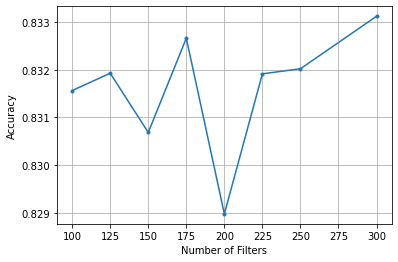

In [45]:
xaxis_filters = [100,125,150,175,200,225,250,300]
plt.plot(xaxis_filters,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Filters')
plt.grid()

plt.savefig("Figures/No.OfFilter_CNN(ConvLSTM).png")
plt.show()

In [26]:
#Layers Tuning for CNN Layer

def create_model(No_Of_layers):
    model = Sequential()
    
    if No_Of_layers == 1:
        model.add(Conv1D(filters=300, kernel_size=3, padding='same', activation='tanh'))
        model.add(MaxPooling1D(pool_size=1))
        model.add(Dropout(0.2))
    elif No_Of_layers == 2:
        model.add(Conv1D(filters=300, kernel_size=3, padding='same', activation='tanh'))
        model.add(MaxPooling1D(pool_size=1))
        model.add(Dropout(0.2))
        model.add(Conv1D(filters=300, kernel_size=3, padding='same', activation='tanh'))
        model.add(MaxPooling1D(pool_size=1))
        model.add(Dropout(0.2))
    elif No_Of_layers == 2:
        model.add(Conv1D(filters=300, kernel_size=3, padding='same', activation='tanh'))
        model.add(MaxPooling1D(pool_size=1))
        model.add(Dropout(0.2))
        model.add(Conv1D(filters=300, kernel_size=3, padding='same', activation='tanh'))
        model.add(MaxPooling1D(pool_size=1))
        model.add(Dropout(0.2))
        model.add(Conv1D(filters=300, kernel_size=3, padding='same', activation='tanh'))
        model.add(MaxPooling1D(pool_size=1))
        model.add(Dropout(0.2))
    
    model.add(LSTM(units=80, input_shape=(1, 11), activation='tanh'))
    model.add(Dropout(0.2))
    
    # Add an output layer 
    model.add(Dense(8, activation='softmax'))
    #compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
    return model

model = KerasClassifier(build_fn=create_model, verbose=1, epochs = 100, batch_size = 80)

parameters = {
    #'unit': [80],
    'No_Of_layers': [1,2,3]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3)

grid_search = grid_search.fit(X_train_L, y_train_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Epoch 1/100


C:\Users\f190806\AppData\Local\Temp\2\ipykernel_3408\2473273660.py:37: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=1, epochs = 100, batch_size = 80)


2675/2675 [==============================] - 11s 3ms/step - loss: 0.7451 - accuracy: 0.7750
Epoch 2/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6595 - accuracy: 0.8019
Epoch 3/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6409 - accuracy: 0.8075
Epoch 4/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6307 - accuracy: 0.8106
Epoch 5/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6237 - accuracy: 0.8126
Epoch 6/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6182 - accuracy: 0.8133
Epoch 7/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6150 - accuracy: 0.8140
Epoch 8/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6111 - accuracy: 0.8143
Epoch 9/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6067 - accuracy: 0.8150
Epoch 10/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6029

Epoch 80/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5610 - accuracy: 0.8265
Epoch 81/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5598 - accuracy: 0.8266
Epoch 82/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5592 - accuracy: 0.8268
Epoch 83/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5596 - accuracy: 0.8268
Epoch 84/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5602 - accuracy: 0.8270
Epoch 85/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5604 - accuracy: 0.8273
Epoch 86/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5604 - accuracy: 0.8268
Epoch 87/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5598 - accuracy: 0.8274
Epoch 88/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5602 - accuracy: 0.8271
Epoch 89/100
2675/2675 [==============================] - 9s 3ms

2675/2675 [==============================] - 9s 3ms/step - loss: 0.5697 - accuracy: 0.8250
Epoch 37/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5685 - accuracy: 0.8247
Epoch 38/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5681 - accuracy: 0.8252
Epoch 39/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5684 - accuracy: 0.8251
Epoch 40/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5678 - accuracy: 0.8255
Epoch 41/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5671 - accuracy: 0.8255
Epoch 42/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5666 - accuracy: 0.8258
Epoch 43/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5669 - accuracy: 0.8256
Epoch 44/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5660 - accuracy: 0.8255
Epoch 45/100
2675/2675 [==============================] - 9s 3ms/step - loss:

2675/2675 [==============================] - 13s 5ms/step - loss: 0.5704 - accuracy: 0.8234
Epoch 93/100
2675/2675 [==============================] - 13s 5ms/step - loss: 0.5709 - accuracy: 0.8239
Epoch 94/100
2675/2675 [==============================] - 13s 5ms/step - loss: 0.5715 - accuracy: 0.8229
Epoch 95/100
2675/2675 [==============================] - 13s 5ms/step - loss: 0.5709 - accuracy: 0.8232
Epoch 96/100
2675/2675 [==============================] - 13s 5ms/step - loss: 0.5697 - accuracy: 0.8241
Epoch 97/100
2675/2675 [==============================] - 13s 5ms/step - loss: 0.5710 - accuracy: 0.8236
Epoch 98/100
2675/2675 [==============================] - 13s 5ms/step - loss: 0.5700 - accuracy: 0.8243
Epoch 99/100
2675/2675 [==============================] - 13s 5ms/step - loss: 0.5705 - accuracy: 0.8237
Epoch 100/100
3343/3343 [==============================] - 8s 2ms/step
Epoch 1/100
2675/2675 [==============================] - 16s 5ms/step - loss: 0.7095 - accuracy: 0.783

2675/2675 [==============================] - 13s 5ms/step - loss: 0.5832 - accuracy: 0.8205
Epoch 47/100
2675/2675 [==============================] - 13s 5ms/step - loss: 0.5812 - accuracy: 0.8212
Epoch 48/100
2675/2675 [==============================] - 13s 5ms/step - loss: 0.5820 - accuracy: 0.8213
Epoch 49/100
2675/2675 [==============================] - 13s 5ms/step - loss: 0.5816 - accuracy: 0.8215
Epoch 50/100
2675/2675 [==============================] - 13s 5ms/step - loss: 0.5804 - accuracy: 0.8203
Epoch 51/100
2675/2675 [==============================] - 13s 5ms/step - loss: 0.5815 - accuracy: 0.8207
Epoch 52/100
2675/2675 [==============================] - 13s 5ms/step - loss: 0.5797 - accuracy: 0.8212
Epoch 53/100
2675/2675 [==============================] - 13s 5ms/step - loss: 0.5784 - accuracy: 0.8218
Epoch 54/100
2675/2675 [==============================] - 13s 5ms/step - loss: 0.5795 - accuracy: 0.8211
Epoch 55/100
2675/2675 [==============================] - 13s 5ms/st

2675/2675 [==============================] - 10s 3ms/step - loss: 1.0001 - accuracy: 0.6852
Epoch 2/100
2675/2675 [==============================] - 7s 3ms/step - loss: 0.8983 - accuracy: 0.7238
Epoch 3/100
2675/2675 [==============================] - 7s 3ms/step - loss: 0.8189 - accuracy: 0.7563
Epoch 4/100
2675/2675 [==============================] - 7s 3ms/step - loss: 0.7828 - accuracy: 0.7738
Epoch 5/100
2675/2675 [==============================] - 7s 3ms/step - loss: 0.7667 - accuracy: 0.7791
Epoch 6/100
2675/2675 [==============================] - 7s 3ms/step - loss: 0.7512 - accuracy: 0.7832
Epoch 7/100
2675/2675 [==============================] - 7s 3ms/step - loss: 0.7354 - accuracy: 0.7863
Epoch 8/100
2675/2675 [==============================] - 7s 3ms/step - loss: 0.7226 - accuracy: 0.7885
Epoch 9/100
2675/2675 [==============================] - 7s 3ms/step - loss: 0.7126 - accuracy: 0.7890
Epoch 10/100
2675/2675 [==============================] - 7s 3ms/step - loss: 0.7040

Epoch 80/100
2675/2675 [==============================] - 7s 3ms/step - loss: 0.5979 - accuracy: 0.8154
Epoch 81/100
2675/2675 [==============================] - 7s 3ms/step - loss: 0.5970 - accuracy: 0.8156
Epoch 82/100
2675/2675 [==============================] - 7s 3ms/step - loss: 0.5980 - accuracy: 0.8152
Epoch 83/100
2675/2675 [==============================] - 7s 3ms/step - loss: 0.5972 - accuracy: 0.8153
Epoch 84/100
2675/2675 [==============================] - 7s 3ms/step - loss: 0.5971 - accuracy: 0.8155
Epoch 85/100
2675/2675 [==============================] - 7s 3ms/step - loss: 0.5962 - accuracy: 0.8155
Epoch 86/100
2675/2675 [==============================] - 7s 3ms/step - loss: 0.5964 - accuracy: 0.8163
Epoch 87/100
2675/2675 [==============================] - 7s 3ms/step - loss: 0.5957 - accuracy: 0.8158
Epoch 88/100
2675/2675 [==============================] - 7s 3ms/step - loss: 0.5951 - accuracy: 0.8169
Epoch 89/100
2675/2675 [==============================] - 7s 3ms

4012/4012 [==============================] - 13s 3ms/step - loss: 0.5636 - accuracy: 0.8262
Epoch 37/100
4012/4012 [==============================] - 13s 3ms/step - loss: 0.5631 - accuracy: 0.8261
Epoch 38/100
4012/4012 [==============================] - 13s 3ms/step - loss: 0.5630 - accuracy: 0.8261
Epoch 39/100
4012/4012 [==============================] - 13s 3ms/step - loss: 0.5625 - accuracy: 0.8267
Epoch 40/100
4012/4012 [==============================] - 13s 3ms/step - loss: 0.5630 - accuracy: 0.8260
Epoch 41/100
4012/4012 [==============================] - 13s 3ms/step - loss: 0.5618 - accuracy: 0.8266
Epoch 42/100
4012/4012 [==============================] - 13s 3ms/step - loss: 0.5620 - accuracy: 0.8266
Epoch 43/100
4012/4012 [==============================] - 13s 3ms/step - loss: 0.5617 - accuracy: 0.8267
Epoch 44/100
4012/4012 [==============================] - 13s 3ms/step - loss: 0.5618 - accuracy: 0.8265
Epoch 45/100
4012/4012 [==============================] - 13s 3ms/st

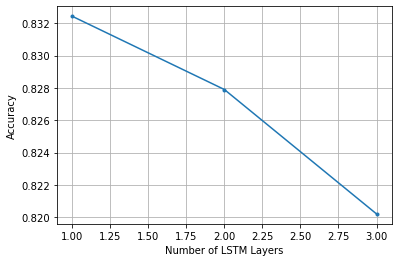

In [28]:
xaxis_CNN_layers =[1,2,3]
plt.plot(xaxis_CNN_layers,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of LSTM Layers')
plt.grid()

plt.savefig("Figures/No.OfLayers_CNN(ConvLSTM).png")
plt.show()

In [26]:
#Perceptron Tuning

def create_model(unit):
    model = Sequential()
    model.add(Conv1D(filters=300, kernel_size=3, padding='same', activation='tanh'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(0.2))
    model.add(LSTM(units=unit, input_shape=(1, 11), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=1, epochs = 100, batch_size = 80)

parameters = {
    'unit': [10,20,30,40,50,60,70,80,90,100],
    #'activation': ['relu','tanh'], 
    #'solver': ['adam','sgd'], 
    #'last_act': ['sigmoid','softmax'],
    #'epochs': [70,100],
    #'batch_size': [5,10] 
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3) # run 1 job at a time

grid_search = grid_search.fit(X_train_L, y_train_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

C:\Users\f190806\AppData\Local\Temp\2\ipykernel_7416\2418018321.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=1, epochs = 100, batch_size = 80)


Epoch 1/100
2675/2675 [==============================] - 19s 3ms/step - loss: 0.8563 - accuracy: 0.7413
Epoch 2/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.7408 - accuracy: 0.7803
Epoch 3/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.7254 - accuracy: 0.7840
Epoch 4/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.7148 - accuracy: 0.7888
Epoch 5/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.7076 - accuracy: 0.7904
Epoch 6/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.7006 - accuracy: 0.7924
Epoch 7/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6966 - accuracy: 0.7929
Epoch 8/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6945 - accuracy: 0.7937
Epoch 9/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6911 - accuracy: 0.7938
Epoch 10/100
2675/2675 [==============================] - 8s 3ms/step - 

2675/2675 [==============================] - 8s 3ms/step - loss: 0.6680 - accuracy: 0.8029
Epoch 58/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6674 - accuracy: 0.8020
Epoch 59/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6697 - accuracy: 0.8013
Epoch 60/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6674 - accuracy: 0.8022
Epoch 61/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6669 - accuracy: 0.8021
Epoch 62/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6693 - accuracy: 0.8016
Epoch 63/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6676 - accuracy: 0.8021
Epoch 64/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6670 - accuracy: 0.8027
Epoch 65/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6672 - accuracy: 0.8021
Epoch 66/100
2675/2675 [==============================] - 8s 3ms/step - loss:

2675/2675 [==============================] - 8s 3ms/step - loss: 0.6388 - accuracy: 0.8094
Epoch 14/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6363 - accuracy: 0.8101
Epoch 15/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6353 - accuracy: 0.8097
Epoch 16/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6354 - accuracy: 0.8097
Epoch 17/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6340 - accuracy: 0.8101
Epoch 18/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6329 - accuracy: 0.8098
Epoch 19/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6326 - accuracy: 0.8104
Epoch 20/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6321 - accuracy: 0.8105
Epoch 21/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6311 - accuracy: 0.8111
Epoch 22/100
2675/2675 [==============================] - 8s 3ms/step - loss:

2675/2675 [==============================] - 8s 3ms/step - loss: 0.6200 - accuracy: 0.8139
Epoch 70/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6204 - accuracy: 0.8146
Epoch 71/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6188 - accuracy: 0.8149
Epoch 72/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6201 - accuracy: 0.8147
Epoch 73/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6190 - accuracy: 0.8141
Epoch 74/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6185 - accuracy: 0.8154
Epoch 75/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6189 - accuracy: 0.8147
Epoch 76/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6188 - accuracy: 0.8150
Epoch 77/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6178 - accuracy: 0.8151
Epoch 78/100
2675/2675 [==============================] - 8s 3ms/step - loss:

2675/2675 [==============================] - 8s 3ms/step - loss: 0.6147 - accuracy: 0.8144
Epoch 26/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6139 - accuracy: 0.8145
Epoch 27/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6125 - accuracy: 0.8150
Epoch 28/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6137 - accuracy: 0.8149
Epoch 29/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6133 - accuracy: 0.8144
Epoch 30/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6131 - accuracy: 0.8141
Epoch 31/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6114 - accuracy: 0.8147
Epoch 32/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6121 - accuracy: 0.8144
Epoch 33/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6113 - accuracy: 0.8155
Epoch 34/100
2675/2675 [==============================] - 8s 3ms/step - loss:

2675/2675 [==============================] - 9s 3ms/step - loss: 0.5958 - accuracy: 0.8203
Epoch 82/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5959 - accuracy: 0.8194
Epoch 83/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5964 - accuracy: 0.8199
Epoch 84/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5961 - accuracy: 0.8204
Epoch 85/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5966 - accuracy: 0.8200
Epoch 86/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5952 - accuracy: 0.8203
Epoch 87/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5953 - accuracy: 0.8205
Epoch 88/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5951 - accuracy: 0.8203
Epoch 89/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5951 - accuracy: 0.8201
Epoch 90/100
2675/2675 [==============================] - 9s 3ms/step - loss:

2675/2675 [==============================] - 9s 3ms/step - loss: 0.5953 - accuracy: 0.8187
Epoch 38/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5940 - accuracy: 0.8195
Epoch 39/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5934 - accuracy: 0.8199
Epoch 40/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5943 - accuracy: 0.8193
Epoch 41/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5934 - accuracy: 0.8191
Epoch 42/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5937 - accuracy: 0.8196
Epoch 43/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5927 - accuracy: 0.8200
Epoch 44/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5913 - accuracy: 0.8204
Epoch 45/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5926 - accuracy: 0.8199
Epoch 46/100
2675/2675 [==============================] - 8s 3ms/step - loss:

2675/2675 [==============================] - 9s 3ms/step - loss: 0.5875 - accuracy: 0.8216
Epoch 94/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5869 - accuracy: 0.8223
Epoch 95/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5854 - accuracy: 0.8217
Epoch 96/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5863 - accuracy: 0.8223
Epoch 97/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5850 - accuracy: 0.8222
Epoch 98/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5858 - accuracy: 0.8220
Epoch 99/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5855 - accuracy: 0.8225
Epoch 100/100
3343/3343 [==============================] - 6s 2ms/step
Epoch 1/100
2675/2675 [==============================] - 11s 3ms/step - loss: 0.7590 - accuracy: 0.7721
Epoch 2/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.6692 - accuracy: 0.8000
Epoch 3

2675/2675 [==============================] - 9s 3ms/step - loss: 0.5818 - accuracy: 0.8227
Epoch 50/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5823 - accuracy: 0.8229
Epoch 51/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5809 - accuracy: 0.8227
Epoch 52/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5811 - accuracy: 0.8227
Epoch 53/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5817 - accuracy: 0.8232
Epoch 54/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5821 - accuracy: 0.8224
Epoch 55/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5803 - accuracy: 0.8229
Epoch 56/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5814 - accuracy: 0.8225
Epoch 57/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5799 - accuracy: 0.8229
Epoch 58/100
2675/2675 [==============================] - 9s 3ms/step - loss:

2675/2675 [==============================] - 9s 3ms/step - loss: 0.6324 - accuracy: 0.8113
Epoch 6/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.6294 - accuracy: 0.8119
Epoch 7/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.6245 - accuracy: 0.8136
Epoch 8/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.6212 - accuracy: 0.8136
Epoch 9/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.6173 - accuracy: 0.8144
Epoch 10/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.6166 - accuracy: 0.8146
Epoch 11/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.6139 - accuracy: 0.8150
Epoch 12/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.6129 - accuracy: 0.8148
Epoch 13/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.6102 - accuracy: 0.8154
Epoch 14/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.6

2675/2675 [==============================] - 9s 3ms/step - loss: 0.5708 - accuracy: 0.8243
Epoch 62/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5696 - accuracy: 0.8253
Epoch 63/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5711 - accuracy: 0.8241
Epoch 64/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5698 - accuracy: 0.8251
Epoch 65/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5705 - accuracy: 0.8248
Epoch 66/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5701 - accuracy: 0.8243
Epoch 67/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5691 - accuracy: 0.8255
Epoch 68/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5700 - accuracy: 0.8246
Epoch 69/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5688 - accuracy: 0.8247
Epoch 70/100
2675/2675 [==============================] - 9s 3ms/step - loss:

2675/2675 [==============================] - 9s 3ms/step - loss: 0.5965 - accuracy: 0.8185
Epoch 18/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5965 - accuracy: 0.8186
Epoch 19/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5942 - accuracy: 0.8187
Epoch 20/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5927 - accuracy: 0.8190
Epoch 21/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5909 - accuracy: 0.8195
Epoch 22/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5906 - accuracy: 0.8194
Epoch 23/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5889 - accuracy: 0.8202
Epoch 24/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5894 - accuracy: 0.8200
Epoch 25/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5879 - accuracy: 0.8206
Epoch 26/100
2675/2675 [==============================] - 9s 3ms/step - loss:

2675/2675 [==============================] - 9s 3ms/step - loss: 0.5633 - accuracy: 0.8270
Epoch 74/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5650 - accuracy: 0.8272
Epoch 75/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5643 - accuracy: 0.8261
Epoch 76/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5653 - accuracy: 0.8261
Epoch 77/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5633 - accuracy: 0.8266
Epoch 78/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5641 - accuracy: 0.8264
Epoch 79/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5639 - accuracy: 0.8266
Epoch 80/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5643 - accuracy: 0.8264
Epoch 81/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5628 - accuracy: 0.8266
Epoch 82/100
2675/2675 [==============================] - 9s 3ms/step - loss:

2675/2675 [==============================] - 9s 3ms/step - loss: 0.5772 - accuracy: 0.8231
Epoch 30/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5758 - accuracy: 0.8232
Epoch 31/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5759 - accuracy: 0.8229
Epoch 32/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5740 - accuracy: 0.8238
Epoch 33/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5756 - accuracy: 0.8227
Epoch 34/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5727 - accuracy: 0.8243
Epoch 35/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5728 - accuracy: 0.8238
Epoch 36/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5726 - accuracy: 0.8240
Epoch 37/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5712 - accuracy: 0.8245
Epoch 38/100
2675/2675 [==============================] - 9s 3ms/step - loss:

2675/2675 [==============================] - 9s 3ms/step - loss: 0.5584 - accuracy: 0.8279
Epoch 86/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5588 - accuracy: 0.8277
Epoch 87/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5587 - accuracy: 0.8274
Epoch 88/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5591 - accuracy: 0.8272
Epoch 89/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5584 - accuracy: 0.8277
Epoch 90/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5593 - accuracy: 0.8271
Epoch 91/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5586 - accuracy: 0.8278
Epoch 92/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5584 - accuracy: 0.8273
Epoch 93/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5584 - accuracy: 0.8274
Epoch 94/100
2675/2675 [==============================] - 8s 3ms/step - loss:

2675/2675 [==============================] - 8s 3ms/step - loss: 0.5675 - accuracy: 0.8249
Epoch 42/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5673 - accuracy: 0.8249
Epoch 43/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5676 - accuracy: 0.8244
Epoch 44/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5674 - accuracy: 0.8250
Epoch 45/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5684 - accuracy: 0.8246
Epoch 46/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5671 - accuracy: 0.8257
Epoch 47/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5662 - accuracy: 0.8258
Epoch 48/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5662 - accuracy: 0.8253
Epoch 49/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5655 - accuracy: 0.8257
Epoch 50/100
2675/2675 [==============================] - 8s 3ms/step - loss:

2675/2675 [==============================] - 9s 3ms/step - loss: 0.5541 - accuracy: 0.8286
Epoch 98/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5546 - accuracy: 0.8277
Epoch 99/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5550 - accuracy: 0.8282
Epoch 100/100
3343/3343 [==============================] - 6s 2ms/step
Epoch 1/100
2675/2675 [==============================] - 11s 3ms/step - loss: 0.7390 - accuracy: 0.7761
Epoch 2/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.6547 - accuracy: 0.8019
Epoch 3/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.6361 - accuracy: 0.8077
Epoch 4/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.6260 - accuracy: 0.8114
Epoch 5/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.6196 - accuracy: 0.8127
Epoch 6/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.6139 - accuracy: 0.8141
Epoch 7/100

2675/2675 [==============================] - 9s 3ms/step - loss: 0.5627 - accuracy: 0.8259
Epoch 54/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5622 - accuracy: 0.8260
Epoch 55/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5611 - accuracy: 0.8265
Epoch 56/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5611 - accuracy: 0.8272
Epoch 57/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5607 - accuracy: 0.8266
Epoch 58/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5607 - accuracy: 0.8264
Epoch 59/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5607 - accuracy: 0.8267
Epoch 60/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5606 - accuracy: 0.8271
Epoch 61/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5615 - accuracy: 0.8259
Epoch 62/100
2675/2675 [==============================] - 9s 3ms/step - loss:

2675/2675 [==============================] - 9s 3ms/step - loss: 0.5994 - accuracy: 0.8161
Epoch 10/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5965 - accuracy: 0.8169
Epoch 11/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5939 - accuracy: 0.8178
Epoch 12/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5893 - accuracy: 0.8192
Epoch 13/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5876 - accuracy: 0.8193
Epoch 14/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5843 - accuracy: 0.8206
Epoch 15/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5833 - accuracy: 0.8199
Epoch 16/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5811 - accuracy: 0.8211
Epoch 17/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5796 - accuracy: 0.8212
Epoch 18/100
2675/2675 [==============================] - 9s 3ms/step - loss:

2675/2675 [==============================] - 9s 3ms/step - loss: 0.5561 - accuracy: 0.8278
Epoch 66/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5558 - accuracy: 0.8279
Epoch 67/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5565 - accuracy: 0.8282
Epoch 68/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5564 - accuracy: 0.8272
Epoch 69/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5557 - accuracy: 0.8275
Epoch 70/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5555 - accuracy: 0.8283
Epoch 71/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5551 - accuracy: 0.8281
Epoch 72/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5559 - accuracy: 0.8275
Epoch 73/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5559 - accuracy: 0.8272
Epoch 74/100
2675/2675 [==============================] - 9s 3ms/step - loss:

4012/4012 [==============================] - 13s 3ms/step - loss: 0.5588 - accuracy: 0.8269
Epoch 44/100
4012/4012 [==============================] - 13s 3ms/step - loss: 0.5579 - accuracy: 0.8270
Epoch 45/100
4012/4012 [==============================] - 13s 3ms/step - loss: 0.5589 - accuracy: 0.8270
Epoch 46/100
4012/4012 [==============================] - 13s 3ms/step - loss: 0.5577 - accuracy: 0.8276
Epoch 47/100
4012/4012 [==============================] - 13s 3ms/step - loss: 0.5587 - accuracy: 0.8268
Epoch 48/100
4012/4012 [==============================] - 13s 3ms/step - loss: 0.5573 - accuracy: 0.8274
Epoch 49/100
4012/4012 [==============================] - 13s 3ms/step - loss: 0.5573 - accuracy: 0.8272
Epoch 50/100
4012/4012 [==============================] - 13s 3ms/step - loss: 0.5576 - accuracy: 0.8270
Epoch 51/100
4012/4012 [==============================] - 13s 3ms/step - loss: 0.5568 - accuracy: 0.8277
Epoch 52/100
4012/4012 [==============================] - 13s 3ms/st

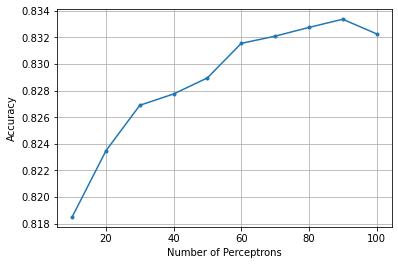

In [27]:
xaxis_perceptrons = [10,20,30,40,50,60,70,80,90,100]
plt.plot(xaxis_perceptrons,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Perceptrons')
plt.grid()

plt.savefig("Figures/No.OfPerceptron_LSTM(ConvLSTM).png")
plt.show()

In [31]:
#Layers Tuning for LSTM Layer

def create_model(No_Of_layers):
    model = Sequential()
    
    if No_Of_layers == 1:
        model.add(Conv1D(filters=300, kernel_size=3, padding='same', activation='tanh'))
        model.add(MaxPooling1D(pool_size=1))
        model.add(Dropout(0.2))
        model.add(LSTM(units=90, input_shape=(1, 11), activation='tanh'))
        model.add(Dropout(0.2))
    elif No_Of_layers == 2:
        model.add(Conv1D(filters=300, kernel_size=3, padding='same', activation='tanh'))
        model.add(MaxPooling1D(pool_size=1))
        model.add(Dropout(0.2))
        model.add(LSTM(units=90, input_shape=(1, 11), return_sequences = True, activation='tanh'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=90, input_shape=(1, 11), activation='tanh'))
        model.add(Dropout(0.2))
    elif No_Of_layers == 3:
        model.add(Conv1D(filters=300, kernel_size=3, padding='same', activation='tanh'))
        model.add(MaxPooling1D(pool_size=1))
        model.add(Dropout(0.2))
        model.add(LSTM(units=90, input_shape=(1, 11), return_sequences = True, activation='tanh'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=90, input_shape=(1, 11), return_sequences = True, activation='tanh'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=90, input_shape=(1, 11), activation='tanh'))
        model.add(Dropout(0.2))
    elif No_Of_layers == 4:
        model.add(Conv1D(filters=300, kernel_size=3, padding='same', activation='tanh'))
        model.add(MaxPooling1D(pool_size=1))
        model.add(Dropout(0.2))
        model.add(LSTM(units=90, input_shape=(1, 11), return_sequences = True, activation='tanh'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=90, input_shape=(1, 11), return_sequences = True, activation='tanh'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=90, input_shape=(1, 11), return_sequences = True, activation='tanh'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=90, input_shape=(1, 11), activation='tanh'))
        model.add(Dropout(0.2))
    elif No_Of_layers == 5:
        model.add(Conv1D(filters=300, kernel_size=3, padding='same', activation='tanh'))
        model.add(MaxPooling1D(pool_size=1))
        model.add(Dropout(0.2))
        model.add(LSTM(units=90, input_shape=(1, 11), return_sequences = True, activation='tanh'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=90, input_shape=(1, 11), return_sequences = True, activation='tanh'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=90, input_shape=(1, 11), return_sequences = True, activation='tanh'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=90, input_shape=(1, 11), return_sequences = True, activation='tanh'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=90, input_shape=(1, 11), activation='tanh'))
        model.add(Dropout(0.2))
    
    # Add an output layer 
    model.add(Dense(8, activation='softmax'))
    #compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
    return model

model = KerasClassifier(build_fn=create_model, verbose=1, epochs = 100, batch_size = 80)

parameters = {
    #'unit': [60],
    'No_Of_layers': [1,2,3,4,5]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3)

grid_search = grid_search.fit(X_train_L, y_train_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Epoch 1/100


C:\Users\f190806\AppData\Local\Temp\2\ipykernel_7416\3191982561.py:63: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=1, epochs = 100, batch_size = 80)


2675/2675 [==============================] - 12s 3ms/step - loss: 0.7418 - accuracy: 0.7751
Epoch 2/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6552 - accuracy: 0.8029
Epoch 3/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6393 - accuracy: 0.8081
Epoch 4/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6292 - accuracy: 0.8107
Epoch 5/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6219 - accuracy: 0.8125
Epoch 6/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6159 - accuracy: 0.8140
Epoch 7/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6120 - accuracy: 0.8145
Epoch 8/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6078 - accuracy: 0.8150
Epoch 9/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6045 - accuracy: 0.8158
Epoch 10/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.6004

Epoch 80/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5563 - accuracy: 0.8283
Epoch 81/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5560 - accuracy: 0.8275
Epoch 82/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5558 - accuracy: 0.8289
Epoch 83/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5571 - accuracy: 0.8277
Epoch 84/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5563 - accuracy: 0.8279
Epoch 85/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5565 - accuracy: 0.8274
Epoch 86/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5554 - accuracy: 0.8282
Epoch 87/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5555 - accuracy: 0.8282
Epoch 88/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5565 - accuracy: 0.8278
Epoch 89/100
2675/2675 [==============================] - 8s 3ms

2675/2675 [==============================] - 8s 3ms/step - loss: 0.5669 - accuracy: 0.8251
Epoch 37/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5661 - accuracy: 0.8246
Epoch 38/100
2675/2675 [==============================] - 9s 3ms/step - loss: 0.5658 - accuracy: 0.8253
Epoch 39/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5652 - accuracy: 0.8258
Epoch 40/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5648 - accuracy: 0.8260
Epoch 41/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5643 - accuracy: 0.8257
Epoch 42/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5640 - accuracy: 0.8257
Epoch 43/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5642 - accuracy: 0.8258
Epoch 44/100
2675/2675 [==============================] - 8s 3ms/step - loss: 0.5636 - accuracy: 0.8260
Epoch 45/100
2675/2675 [==============================] - 8s 3ms/step - loss:

2675/2675 [==============================] - 12s 4ms/step - loss: 0.5489 - accuracy: 0.8293
Epoch 93/100
2675/2675 [==============================] - 12s 4ms/step - loss: 0.5500 - accuracy: 0.8291
Epoch 94/100
2675/2675 [==============================] - 12s 4ms/step - loss: 0.5496 - accuracy: 0.8296
Epoch 95/100
2675/2675 [==============================] - 12s 4ms/step - loss: 0.5490 - accuracy: 0.8292
Epoch 96/100
2675/2675 [==============================] - 12s 4ms/step - loss: 0.5496 - accuracy: 0.8293
Epoch 97/100
2675/2675 [==============================] - 11s 4ms/step - loss: 0.5489 - accuracy: 0.8290
Epoch 98/100
2675/2675 [==============================] - 12s 4ms/step - loss: 0.5486 - accuracy: 0.8290
Epoch 99/100
2675/2675 [==============================] - 12s 4ms/step - loss: 0.5488 - accuracy: 0.8290
Epoch 100/100
3343/3343 [==============================] - 8s 2ms/step
Epoch 1/100
2675/2675 [==============================] - 16s 4ms/step - loss: 0.7347 - accuracy: 0.776

2675/2675 [==============================] - 11s 4ms/step - loss: 0.5591 - accuracy: 0.8263
Epoch 47/100
2675/2675 [==============================] - 11s 4ms/step - loss: 0.5588 - accuracy: 0.8265
Epoch 48/100
2675/2675 [==============================] - 11s 4ms/step - loss: 0.5577 - accuracy: 0.8266
Epoch 49/100
2675/2675 [==============================] - 11s 4ms/step - loss: 0.5572 - accuracy: 0.8270
Epoch 50/100
2675/2675 [==============================] - 11s 4ms/step - loss: 0.5580 - accuracy: 0.8273
Epoch 51/100
2675/2675 [==============================] - 11s 4ms/step - loss: 0.5578 - accuracy: 0.8270
Epoch 52/100
2675/2675 [==============================] - 11s 4ms/step - loss: 0.5569 - accuracy: 0.8269
Epoch 53/100
2675/2675 [==============================] - 11s 4ms/step - loss: 0.5563 - accuracy: 0.8266
Epoch 54/100
2675/2675 [==============================] - 11s 4ms/step - loss: 0.5562 - accuracy: 0.8270
Epoch 55/100
2675/2675 [==============================] - 11s 4ms/st

3343/3343 [==============================] - 9s 2ms/step
Epoch 1/100
2675/2675 [==============================] - 22s 5ms/step - loss: 0.7513 - accuracy: 0.7692
Epoch 2/100
2675/2675 [==============================] - 14s 5ms/step - loss: 0.6588 - accuracy: 0.7996
Epoch 3/100
2675/2675 [==============================] - 14s 5ms/step - loss: 0.6470 - accuracy: 0.8033
Epoch 4/100
2675/2675 [==============================] - 14s 5ms/step - loss: 0.6402 - accuracy: 0.8051
Epoch 5/100
2675/2675 [==============================] - 14s 5ms/step - loss: 0.6338 - accuracy: 0.8068
Epoch 6/100
2675/2675 [==============================] - 14s 5ms/step - loss: 0.6286 - accuracy: 0.8086
Epoch 7/100
2675/2675 [==============================] - 14s 5ms/step - loss: 0.6241 - accuracy: 0.8112
Epoch 8/100
2675/2675 [==============================] - 14s 5ms/step - loss: 0.6212 - accuracy: 0.8111
Epoch 9/100
2675/2675 [==============================] - 14s 5ms/step - loss: 0.6164 - accuracy: 0.8125
Epoch 1

2675/2675 [==============================] - 15s 5ms/step - loss: 0.5572 - accuracy: 0.8264
Epoch 56/100
2675/2675 [==============================] - 15s 5ms/step - loss: 0.5581 - accuracy: 0.8260
Epoch 57/100
2675/2675 [==============================] - 14s 5ms/step - loss: 0.5582 - accuracy: 0.8264
Epoch 58/100
2675/2675 [==============================] - 15s 5ms/step - loss: 0.5566 - accuracy: 0.8262
Epoch 59/100
2675/2675 [==============================] - 15s 5ms/step - loss: 0.5575 - accuracy: 0.8264
Epoch 60/100
2675/2675 [==============================] - 15s 6ms/step - loss: 0.5573 - accuracy: 0.8267
Epoch 61/100
2675/2675 [==============================] - 15s 5ms/step - loss: 0.5568 - accuracy: 0.8267
Epoch 62/100
2675/2675 [==============================] - 14s 5ms/step - loss: 0.5556 - accuracy: 0.8267
Epoch 63/100
2675/2675 [==============================] - 14s 5ms/step - loss: 0.5567 - accuracy: 0.8272
Epoch 64/100
2675/2675 [==============================] - 14s 5ms/st

2675/2675 [==============================] - 17s 6ms/step - loss: 0.6244 - accuracy: 0.8113
Epoch 10/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.6204 - accuracy: 0.8121
Epoch 11/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.6181 - accuracy: 0.8123
Epoch 12/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.6153 - accuracy: 0.8126
Epoch 13/100
2675/2675 [==============================] - 17s 7ms/step - loss: 0.6121 - accuracy: 0.8141
Epoch 14/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.6098 - accuracy: 0.8144
Epoch 15/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.6063 - accuracy: 0.8152
Epoch 16/100
2675/2675 [==============================] - 16s 6ms/step - loss: 0.6043 - accuracy: 0.8157
Epoch 17/100
2675/2675 [==============================] - 16s 6ms/step - loss: 0.6035 - accuracy: 0.8159
Epoch 18/100
2675/2675 [==============================] - 17s 6ms/st

2675/2675 [==============================] - 17s 6ms/step - loss: 0.5608 - accuracy: 0.8255
Epoch 65/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.5603 - accuracy: 0.8261
Epoch 66/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.5598 - accuracy: 0.8261
Epoch 67/100
2675/2675 [==============================] - 17s 7ms/step - loss: 0.5594 - accuracy: 0.8263
Epoch 68/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.5601 - accuracy: 0.8259
Epoch 69/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.5592 - accuracy: 0.8260
Epoch 70/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.5594 - accuracy: 0.8259
Epoch 71/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.5587 - accuracy: 0.8262
Epoch 72/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.5581 - accuracy: 0.8266
Epoch 73/100
2675/2675 [==============================] - 17s 7ms/st

2675/2675 [==============================] - 20s 7ms/step - loss: 0.6082 - accuracy: 0.8157
Epoch 19/100
2675/2675 [==============================] - 20s 8ms/step - loss: 0.6061 - accuracy: 0.8158
Epoch 20/100
2675/2675 [==============================] - 20s 8ms/step - loss: 0.6054 - accuracy: 0.8158
Epoch 21/100
2675/2675 [==============================] - 20s 8ms/step - loss: 0.6028 - accuracy: 0.8166
Epoch 22/100
2675/2675 [==============================] - 20s 8ms/step - loss: 0.6028 - accuracy: 0.8162
Epoch 23/100
2675/2675 [==============================] - 20s 8ms/step - loss: 0.5999 - accuracy: 0.8175
Epoch 24/100
2675/2675 [==============================] - 20s 8ms/step - loss: 0.5991 - accuracy: 0.8177
Epoch 25/100
2675/2675 [==============================] - 20s 8ms/step - loss: 0.5959 - accuracy: 0.8183
Epoch 26/100
2675/2675 [==============================] - 20s 8ms/step - loss: 0.5948 - accuracy: 0.8176
Epoch 27/100
2675/2675 [==============================] - 20s 8ms/st

2675/2675 [==============================] - 20s 8ms/step - loss: 0.5648 - accuracy: 0.8250
Epoch 74/100
2675/2675 [==============================] - 20s 8ms/step - loss: 0.5640 - accuracy: 0.8251
Epoch 75/100
2675/2675 [==============================] - 20s 8ms/step - loss: 0.5625 - accuracy: 0.8264
Epoch 76/100
2675/2675 [==============================] - 20s 8ms/step - loss: 0.5624 - accuracy: 0.8265
Epoch 77/100
2675/2675 [==============================] - 20s 8ms/step - loss: 0.5623 - accuracy: 0.8259
Epoch 78/100
2675/2675 [==============================] - 20s 8ms/step - loss: 0.5631 - accuracy: 0.8263
Epoch 79/100
2675/2675 [==============================] - 20s 8ms/step - loss: 0.5621 - accuracy: 0.8257
Epoch 80/100
2675/2675 [==============================] - 20s 8ms/step - loss: 0.5625 - accuracy: 0.8261
Epoch 81/100
2675/2675 [==============================] - 20s 7ms/step - loss: 0.5614 - accuracy: 0.8254
Epoch 82/100
2675/2675 [==============================] - 20s 8ms/st

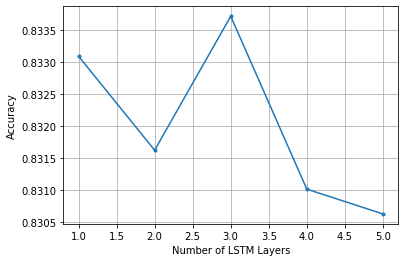

In [34]:
xaxis_LSTM_layers =[1,2,3,4,5]
plt.plot(xaxis_LSTM_layers,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of LSTM Layers')
plt.grid()

plt.savefig("Figures/No.OfLayers_LSTM(ConvLSTM).png")
plt.show()

In [35]:
#Layers Tuning for Dense Layer

def create_model(No_Of_layers):
    model = Sequential()
    # Add an input layer
    model.add(Conv1D(filters=300, kernel_size=3, padding='same', activation='tanh'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(0.2))
    model.add(LSTM(units=90, input_shape=(1, 11), return_sequences = True, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(LSTM(units=90, input_shape=(1, 11), return_sequences = True, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(LSTM(units=90, input_shape=(1, 11), activation='tanh'))
    model.add(Dropout(0.2))

    for i in range(No_Of_layers):
        model.add(Dense(units=90, activation='tanh'))
        model.add(Dropout(0.2))

    # Add an output layer 
    model.add(Dense(8, activation='softmax'))
    #compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
    return model

model = KerasClassifier(build_fn=create_model, verbose=1, epochs = 100, batch_size = 80)

parameters = {
    #'unit': [95],
    'No_Of_layers': [0,1,2,3,4,5]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3)

grid_search = grid_search.fit(X_train_L, y_train_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Epoch 1/100


C:\Users\f190806\AppData\Local\Temp\2\ipykernel_7416\451185843.py:26: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=1, epochs = 100, batch_size = 80)


2675/2675 [==============================] - 22s 5ms/step - loss: 0.7508 - accuracy: 0.7698
Epoch 2/100
2675/2675 [==============================] - 14s 5ms/step - loss: 0.6658 - accuracy: 0.7979
Epoch 3/100
2675/2675 [==============================] - 14s 5ms/step - loss: 0.6524 - accuracy: 0.8026
Epoch 4/100
2675/2675 [==============================] - 14s 5ms/step - loss: 0.6448 - accuracy: 0.8052
Epoch 5/100
2675/2675 [==============================] - 14s 5ms/step - loss: 0.6404 - accuracy: 0.8062
Epoch 6/100
2675/2675 [==============================] - 14s 5ms/step - loss: 0.6321 - accuracy: 0.8087
Epoch 7/100
2675/2675 [==============================] - 14s 5ms/step - loss: 0.6269 - accuracy: 0.8101
Epoch 8/100
2675/2675 [==============================] - 14s 5ms/step - loss: 0.6235 - accuracy: 0.8106
Epoch 9/100
2675/2675 [==============================] - 14s 5ms/step - loss: 0.6194 - accuracy: 0.8117
Epoch 10/100
2675/2675 [==============================] - 14s 5ms/step - los

2675/2675 [==============================] - 15s 5ms/step - loss: 0.5570 - accuracy: 0.8268
Epoch 57/100
2675/2675 [==============================] - 14s 5ms/step - loss: 0.5562 - accuracy: 0.8268
Epoch 58/100
2675/2675 [==============================] - 15s 5ms/step - loss: 0.5556 - accuracy: 0.8272
Epoch 59/100
2675/2675 [==============================] - 15s 5ms/step - loss: 0.5559 - accuracy: 0.8268
Epoch 60/100
2675/2675 [==============================] - 14s 5ms/step - loss: 0.5553 - accuracy: 0.8271
Epoch 61/100
2675/2675 [==============================] - 15s 5ms/step - loss: 0.5554 - accuracy: 0.8273
Epoch 62/100
2675/2675 [==============================] - 15s 5ms/step - loss: 0.5550 - accuracy: 0.8268
Epoch 63/100
2675/2675 [==============================] - 14s 5ms/step - loss: 0.5549 - accuracy: 0.8273
Epoch 64/100
2675/2675 [==============================] - 14s 5ms/step - loss: 0.5551 - accuracy: 0.8268
Epoch 65/100
2675/2675 [==============================] - 15s 5ms/st

2675/2675 [==============================] - 15s 6ms/step - loss: 0.6213 - accuracy: 0.8113
Epoch 11/100
2675/2675 [==============================] - 16s 6ms/step - loss: 0.6176 - accuracy: 0.8122
Epoch 12/100
2675/2675 [==============================] - 15s 6ms/step - loss: 0.6158 - accuracy: 0.8123
Epoch 13/100
2675/2675 [==============================] - 15s 6ms/step - loss: 0.6129 - accuracy: 0.8133
Epoch 14/100
2675/2675 [==============================] - 15s 6ms/step - loss: 0.6100 - accuracy: 0.8137
Epoch 15/100
2675/2675 [==============================] - 15s 6ms/step - loss: 0.6072 - accuracy: 0.8137
Epoch 16/100
2675/2675 [==============================] - 15s 6ms/step - loss: 0.6047 - accuracy: 0.8149
Epoch 17/100
2675/2675 [==============================] - 15s 6ms/step - loss: 0.6020 - accuracy: 0.8153
Epoch 18/100
2675/2675 [==============================] - 15s 6ms/step - loss: 0.5980 - accuracy: 0.8170
Epoch 19/100
2675/2675 [==============================] - 15s 6ms/st

2675/2675 [==============================] - 15s 6ms/step - loss: 0.5610 - accuracy: 0.8256
Epoch 66/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.5594 - accuracy: 0.8262
Epoch 67/100
2675/2675 [==============================] - 15s 6ms/step - loss: 0.5579 - accuracy: 0.8268
Epoch 68/100
2675/2675 [==============================] - 15s 6ms/step - loss: 0.5590 - accuracy: 0.8258
Epoch 69/100
2675/2675 [==============================] - 15s 6ms/step - loss: 0.5585 - accuracy: 0.8267
Epoch 70/100
2675/2675 [==============================] - 15s 6ms/step - loss: 0.5585 - accuracy: 0.8262
Epoch 71/100
2675/2675 [==============================] - 15s 6ms/step - loss: 0.5590 - accuracy: 0.8263
Epoch 72/100
2675/2675 [==============================] - 15s 6ms/step - loss: 0.5587 - accuracy: 0.8263
Epoch 73/100
2675/2675 [==============================] - 15s 6ms/step - loss: 0.5577 - accuracy: 0.8266
Epoch 74/100
2675/2675 [==============================] - 15s 6ms/st

2675/2675 [==============================] - 16s 6ms/step - loss: 0.6084 - accuracy: 0.8142
Epoch 20/100
2675/2675 [==============================] - 16s 6ms/step - loss: 0.6064 - accuracy: 0.8153
Epoch 21/100
2675/2675 [==============================] - 16s 6ms/step - loss: 0.6054 - accuracy: 0.8155
Epoch 22/100
2675/2675 [==============================] - 16s 6ms/step - loss: 0.6032 - accuracy: 0.8149
Epoch 23/100
2675/2675 [==============================] - 16s 6ms/step - loss: 0.6021 - accuracy: 0.8159
Epoch 24/100
2675/2675 [==============================] - 16s 6ms/step - loss: 0.5996 - accuracy: 0.8164
Epoch 25/100
2675/2675 [==============================] - 16s 6ms/step - loss: 0.5993 - accuracy: 0.8158
Epoch 26/100
2675/2675 [==============================] - 16s 6ms/step - loss: 0.5966 - accuracy: 0.8170
Epoch 27/100
2675/2675 [==============================] - 16s 6ms/step - loss: 0.5963 - accuracy: 0.8172
Epoch 28/100
2675/2675 [==============================] - 16s 6ms/st

2675/2675 [==============================] - 16s 6ms/step - loss: 0.5737 - accuracy: 0.8219
Epoch 75/100
2675/2675 [==============================] - 16s 6ms/step - loss: 0.5736 - accuracy: 0.8222
Epoch 76/100
2675/2675 [==============================] - 16s 6ms/step - loss: 0.5732 - accuracy: 0.8236
Epoch 77/100
2675/2675 [==============================] - 16s 6ms/step - loss: 0.5734 - accuracy: 0.8233
Epoch 78/100
2675/2675 [==============================] - 16s 6ms/step - loss: 0.5723 - accuracy: 0.8231
Epoch 79/100
2675/2675 [==============================] - 16s 6ms/step - loss: 0.5735 - accuracy: 0.8222
Epoch 80/100
2675/2675 [==============================] - 16s 6ms/step - loss: 0.5726 - accuracy: 0.8239
Epoch 81/100
2675/2675 [==============================] - 16s 6ms/step - loss: 0.5731 - accuracy: 0.8235
Epoch 82/100
2675/2675 [==============================] - 16s 6ms/step - loss: 0.5733 - accuracy: 0.8233
Epoch 83/100
2675/2675 [==============================] - 16s 6ms/st

2675/2675 [==============================] - 16s 6ms/step - loss: 0.6140 - accuracy: 0.8147
Epoch 29/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.6135 - accuracy: 0.8154
Epoch 30/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.6137 - accuracy: 0.8146
Epoch 31/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.6131 - accuracy: 0.8140
Epoch 32/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.6120 - accuracy: 0.8143
Epoch 33/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.6111 - accuracy: 0.8143
Epoch 34/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.6104 - accuracy: 0.8150
Epoch 35/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.6082 - accuracy: 0.8159
Epoch 36/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.6081 - accuracy: 0.8155
Epoch 37/100
2675/2675 [==============================] - 17s 6ms/st

2675/2675 [==============================] - 17s 6ms/step - loss: 0.5908 - accuracy: 0.8202
Epoch 84/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.5926 - accuracy: 0.8194
Epoch 85/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.5933 - accuracy: 0.8194
Epoch 86/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.5902 - accuracy: 0.8196
Epoch 87/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.5935 - accuracy: 0.8194
Epoch 88/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.5907 - accuracy: 0.8196
Epoch 89/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.5958 - accuracy: 0.8184
Epoch 90/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.5917 - accuracy: 0.8193
Epoch 91/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.5905 - accuracy: 0.8195
Epoch 92/100
2675/2675 [==============================] - 17s 6ms/st

2675/2675 [==============================] - 17s 6ms/step - loss: 0.6223 - accuracy: 0.8123
Epoch 38/100
2675/2675 [==============================] - 17s 7ms/step - loss: 0.6207 - accuracy: 0.8127
Epoch 39/100
2675/2675 [==============================] - 18s 7ms/step - loss: 0.6196 - accuracy: 0.8124
Epoch 40/100
2675/2675 [==============================] - 16s 6ms/step - loss: 0.6184 - accuracy: 0.8123
Epoch 41/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.6203 - accuracy: 0.8122
Epoch 42/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.6185 - accuracy: 0.8129
Epoch 43/100
2675/2675 [==============================] - 17s 7ms/step - loss: 0.6194 - accuracy: 0.8112
Epoch 44/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.6169 - accuracy: 0.8120
Epoch 45/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.6163 - accuracy: 0.8138
Epoch 46/100
2675/2675 [==============================] - 17s 6ms/st

2675/2675 [==============================] - 18s 7ms/step - loss: 0.6114 - accuracy: 0.8139
Epoch 93/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.6185 - accuracy: 0.8133
Epoch 94/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.6114 - accuracy: 0.8147
Epoch 95/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.6118 - accuracy: 0.8149
Epoch 96/100
2675/2675 [==============================] - 17s 7ms/step - loss: 0.6106 - accuracy: 0.8149
Epoch 97/100
2675/2675 [==============================] - 16s 6ms/step - loss: 0.6115 - accuracy: 0.8143
Epoch 98/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.6144 - accuracy: 0.8133
Epoch 99/100
2675/2675 [==============================] - 17s 7ms/step - loss: 0.6124 - accuracy: 0.8137
Epoch 100/100
3343/3343 [==============================] - 9s 2ms/step
Epoch 1/100
2675/2675 [==============================] - 25s 6ms/step - loss: 0.7717 - accuracy: 0.763

2675/2675 [==============================] - 19s 7ms/step - loss: 0.6282 - accuracy: 0.8109
Epoch 47/100
2675/2675 [==============================] - 19s 7ms/step - loss: 0.6293 - accuracy: 0.8105
Epoch 48/100
2675/2675 [==============================] - 19s 7ms/step - loss: 0.6310 - accuracy: 0.8110
Epoch 49/100
2675/2675 [==============================] - 19s 7ms/step - loss: 0.6333 - accuracy: 0.8102
Epoch 50/100
2675/2675 [==============================] - 17s 6ms/step - loss: 0.6313 - accuracy: 0.8096
Epoch 51/100
2675/2675 [==============================] - 18s 7ms/step - loss: 0.6314 - accuracy: 0.8096
Epoch 52/100
2675/2675 [==============================] - 18s 7ms/step - loss: 0.6407 - accuracy: 0.8070
Epoch 53/100
2675/2675 [==============================] - 18s 7ms/step - loss: 0.6321 - accuracy: 0.8100
Epoch 54/100
2675/2675 [==============================] - 18s 7ms/step - loss: 0.6325 - accuracy: 0.8100
Epoch 55/100
2675/2675 [==============================] - 18s 7ms/st

3343/3343 [==============================] - 10s 3ms/step
Epoch 1/100
2675/2675 [==============================] - 26s 7ms/step - loss: 0.7730 - accuracy: 0.7602
Epoch 2/100
2675/2675 [==============================] - 18s 7ms/step - loss: 0.6964 - accuracy: 0.7865
Epoch 3/100
2675/2675 [==============================] - 18s 7ms/step - loss: 0.6789 - accuracy: 0.7920
Epoch 4/100
2675/2675 [==============================] - 18s 7ms/step - loss: 0.6705 - accuracy: 0.7952
Epoch 5/100
2675/2675 [==============================] - 18s 7ms/step - loss: 0.6639 - accuracy: 0.7971
Epoch 6/100
2675/2675 [==============================] - 18s 7ms/step - loss: 0.6604 - accuracy: 0.7986
Epoch 7/100
2675/2675 [==============================] - 18s 7ms/step - loss: 0.6555 - accuracy: 0.8008
Epoch 8/100
2675/2675 [==============================] - 18s 7ms/step - loss: 0.6532 - accuracy: 0.8012
Epoch 9/100
2675/2675 [==============================] - 18s 7ms/step - loss: 0.6518 - accuracy: 0.8024
Epoch 

4012/4012 [==============================] - 22s 5ms/step - loss: 0.5547 - accuracy: 0.8275
Epoch 56/100
4012/4012 [==============================] - 22s 5ms/step - loss: 0.5548 - accuracy: 0.8270
Epoch 57/100
4012/4012 [==============================] - 22s 5ms/step - loss: 0.5532 - accuracy: 0.8278
Epoch 58/100
4012/4012 [==============================] - 22s 5ms/step - loss: 0.5533 - accuracy: 0.8280
Epoch 59/100
4012/4012 [==============================] - 22s 5ms/step - loss: 0.5546 - accuracy: 0.8273
Epoch 60/100
4012/4012 [==============================] - 22s 5ms/step - loss: 0.5539 - accuracy: 0.8280
Epoch 61/100
4012/4012 [==============================] - 22s 6ms/step - loss: 0.5536 - accuracy: 0.8273
Epoch 62/100
4012/4012 [==============================] - 22s 5ms/step - loss: 0.5541 - accuracy: 0.8272
Epoch 63/100
4012/4012 [==============================] - 22s 6ms/step - loss: 0.5542 - accuracy: 0.8269
Epoch 64/100
4012/4012 [==============================] - 22s 5ms/st

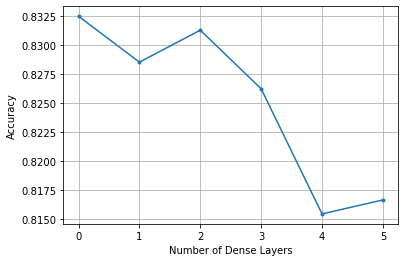

In [36]:
xaxis_layers = [0,1,2,3,4,5]
plt.plot(xaxis_layers,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Dense Layers')
plt.grid()

plt.savefig("Figures/No.OfLayers_Dense(ConvLSTM).png")
plt.show()

In [ ]:
#Perceptron Tuning for Dense Layer

def create_model(unit):
    model = Sequential()
    model.add(LSTM(units=60, input_shape=(1, 11), return_sequences = True, activation='relu'))
    model.add(Dropout(0.2))
    model.add(LSTM(units=60, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0, epochs = 35, batch_size = 64)

parameters = {
    'unit': [10,20,30,40,50,60,70,80,90,100],
    #'activation': ['relu','tanh'], 
    #'solver': ['adam','sgd'], 
    #'last_act': ['sigmoid','softmax'],
    #'epochs': [70,100],
    #'batch_size': [5,10] 
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3)

grid_search = grid_search.fit(X_train_L, y_train_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

In [ ]:
xaxis_perceptrons = [10,20,30,40,50,60,70,80,90,100]
plt.plot(xaxis_perceptrons,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Perceptrons in Dense layer')
plt.grid()

plt.savefig("Figures/No.OfPerceptron_Dense(ConvLSTM).png")
plt.show()

In [37]:
#Epochs Tuning

def create_model():
    model = Sequential()
    model.add(Conv1D(filters=300, kernel_size=3, padding='same', activation='tanh'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(0.2))
    model.add(LSTM(units=90, input_shape=(1, 11), return_sequences = True, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(LSTM(units=90, input_shape=(1, 11), return_sequences = True, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(LSTM(units=90, input_shape=(1, 11), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='softmax'))
    #compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0, batch_size = 80)

parameters = {
    #'unit': [95],
    'epochs': [30,40,50,60,70,80,90,100]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3)

grid_search = grid_search.fit(X_train_L, y_train_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

C:\Users\f190806\AppData\Local\Temp\2\ipykernel_7416\2398920301.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0, batch_size = 80)


3343/3343 [==============================] - 9s 2ms/step
Best Results with Grid Search:
0.8330326119135543
{'epochs': 100}


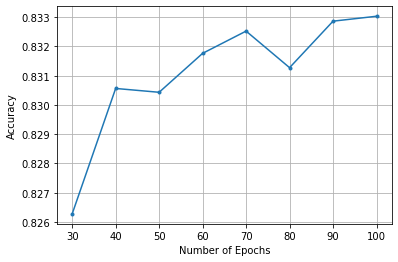

In [38]:
xaxis_epochs = [30,40,50,60,70,80,90,100]
plt.plot(xaxis_epochs,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.grid()

plt.savefig("Figures/No.OfEpochs(ConvLSTM).png")
plt.show()

In [24]:
#Batch Size Tuning

def create_model():
    model = Sequential()
    model.add(Conv1D(filters=300, kernel_size=3, padding='same', activation='tanh'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(0.2))
    model.add(LSTM(units=90, input_shape=(1, 11), return_sequences = True, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(LSTM(units=90, input_shape=(1, 11), return_sequences = True, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(LSTM(units=90, input_shape=(1, 11), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='softmax'))
    #compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0, epochs = 100)

parameters = {
    #'unit': [95],
    'batch_size': [30,40,50,60,70,80,90,100]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3)

grid_search = grid_search.fit(X_train_L, y_train_L)

print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

C:\Users\f190806\AppData\Local\Temp\2\ipykernel_6204\304852220.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0, epochs = 100)


3343/3343 [==============================] - 9s 2ms/step
0.8326773555212764
{'batch_size': 60}


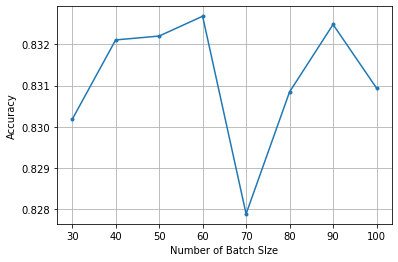

In [25]:
xaxis_batch = [30,40,50,60,70,80,90,100]
plt.plot(xaxis_batch,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Batch SIze')
plt.grid()

plt.savefig("Figures/No.OfBatch(ConvLSTM).png")
plt.show()

In [ ]:
#Tuning with Grid Seaerch CV

def create_model(nb_filters, unit, solver, dropout, activation):
    model = Sequential()
    model.add(Conv1D(filters=nb_filters, kernel_size=3, padding='same', activation=activation))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(dropout))
    model.add(LSTM(units=unit, input_shape=(1, 11), return_sequences = True, activation=activation))
    model.add(Dropout(dropout))
    model.add(LSTM(units=unit, input_shape=(1, 11), return_sequences = True, activation=activation))
    model.add(Dropout(dropout))
    model.add(LSTM(units=unit, input_shape=(1, 11), activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(8, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=solver, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

parameters = {
    'nb_filters' : [175,300],
    'unit': [80,90],
    'dropout': [0.1,0.2],
    'activation': ['relu','tanh'],  
    'solver': ['adam','Adamax'],
    'epochs': [80,100],
    'batch_size': [60,90]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3)

grid_search = grid_search.fit(X_train_L, y_train_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

C:\Users\f190806\AppData\Local\Temp\3/ipykernel_7264/2890131643.py:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [ ]:
print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred = grid_search.predict(X_test_L)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(y_test_L, y_pred)))
print(confusion_matrix(y_test_L,y_pred))
print(classification_report(y_test_L,y_pred))

In [46]:
nb_filter = 250
filter_length = 3

model = Sequential()
model.add(Conv1D(filters=nb_filter, kernel_size=filter_length, padding='same', activation='tanh'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=1))
model.add(Dropout(0.2))
model.add(LSTM(17))
model.add(Dropout(0.2))
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(trainX, trainY, epochs=70, batch_size=128, verbose=2, validation_data=(testX, testY))

Epoch 1/70
2507/2507 - 21s - loss: 0.7727 - accuracy: 0.7633 - val_loss: 0.6668 - val_accuracy: 0.8000 - 21s/epoch - 8ms/step
Epoch 2/70
2507/2507 - 19s - loss: 0.6910 - accuracy: 0.7916 - val_loss: 0.6436 - val_accuracy: 0.8077 - 19s/epoch - 8ms/step
Epoch 3/70
2507/2507 - 17s - loss: 0.6761 - accuracy: 0.7958 - val_loss: 0.6371 - val_accuracy: 0.8066 - 17s/epoch - 7ms/step
Epoch 4/70
2507/2507 - 18s - loss: 0.6686 - accuracy: 0.7982 - val_loss: 0.6406 - val_accuracy: 0.8077 - 18s/epoch - 7ms/step
Epoch 5/70
2507/2507 - 17s - loss: 0.6633 - accuracy: 0.7989 - val_loss: 0.6283 - val_accuracy: 0.8108 - 17s/epoch - 7ms/step
Epoch 6/70
2507/2507 - 18s - loss: 0.6595 - accuracy: 0.8007 - val_loss: 0.6425 - val_accuracy: 0.8051 - 18s/epoch - 7ms/step
Epoch 7/70
2507/2507 - 19s - loss: 0.6576 - accuracy: 0.8007 - val_loss: 0.6249 - val_accuracy: 0.8114 - 19s/epoch - 7ms/step
Epoch 8/70
2507/2507 - 19s - loss: 0.6536 - accuracy: 0.8021 - val_loss: 0.6206 - val_accuracy: 0.8112 - 19s/epoch - 8

Epoch 66/70
2507/2507 - 17s - loss: 0.6270 - accuracy: 0.8093 - val_loss: 0.6034 - val_accuracy: 0.8139 - 17s/epoch - 7ms/step
Epoch 67/70
2507/2507 - 17s - loss: 0.6268 - accuracy: 0.8093 - val_loss: 0.6076 - val_accuracy: 0.8118 - 17s/epoch - 7ms/step
Epoch 68/70
2507/2507 - 17s - loss: 0.6272 - accuracy: 0.8096 - val_loss: 0.6079 - val_accuracy: 0.8132 - 17s/epoch - 7ms/step
Epoch 69/70
2507/2507 - 17s - loss: 0.6264 - accuracy: 0.8095 - val_loss: 0.6081 - val_accuracy: 0.8128 - 17s/epoch - 7ms/step
Epoch 70/70
2507/2507 - 17s - loss: 0.6266 - accuracy: 0.8091 - val_loss: 0.5954 - val_accuracy: 0.8162 - 17s/epoch - 7ms/step


In [47]:
loss, accuracy = model.evaluate(testX, testY)
print("Loss:" + str(loss))
print("Accuracy:" + str(accuracy))

2507/2507 [==============================] - 7s 2ms/step - loss: 0.5954 - accuracy: 0.8162
Loss:0.5954145789146423
Accuracy:0.8161522746086121


In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 1, 250)            8500      
                                                                 
 dropout_14 (Dropout)        (None, 1, 250)            0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 1, 250)           0         
 1D)                                                             
                                                                 
 dropout_15 (Dropout)        (None, 1, 250)            0         
                                                                 
 lstm_2 (LSTM)               (None, 17)                18224     
                                                                 
 dropout_16 (Dropout)        (None, 17)                0         
                                                      